In [36]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
import lightgbm as lgb
from itertools import combinations

from catboost import Pool, CatBoostRegressor
# from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
weather = pd.read_csv('data/weather_v2.csv')
target = pd.read_csv('data/EDA_target.csv')

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols = ['temp', 'ws', 'wd', 'humid', 'landP', 'seaP', 'sfctemp']

# 5. 모델 학습 및 검증
- lgbm을 이용하여 2가지 모델 작성

 
- 1) 과거 정보를 이용해 supply, 기상정보를 예측하는 모델 (시계열 모델)

- 2) supply, 기상정보를 이용하여 smp를 예측하는 모델 (상관관계 모델)

- 1)의 모델을 이용해 supply, 기상정보를 예측한 후 2)의 모델로 smp를 예측

In [4]:
past = 29 # 최근 30일 정보를 이용하여 n일 후를 예측

In [5]:
def trans(dataset, start_index, end_index, past, future, x_columns, y_columns):
    dataset.index = range(dataset.shape[0])
    data = []
    labels = []
    
    start_index = start_index + past
    
    if end_index is None:
        end_index = dataset.shape[0]
    
    for i in range(start_index, end_index-future):
        indices = np.array(dataset.loc[i-past:i, x_columns])
        data.append(indices)
        
        labels.append(np.array(dataset.loc[i+future, y_columns]))
        
    data = np.array(data)
    data = data.reshape(data.shape[0], -1)
    labels = np.array(labels)
    labels = labels.reshape(-1)
    
    return data, labels

In [25]:
def create_model(x_train, y_train, x_val, y_val):
    params = {
        'metric': 'mae',
        'seed':7777
        }
    
    d_train = lgb.Dataset(x_train, y_train)
    d_val = lgb.Dataset(x_val, y_val)

    model = lgb.train(params, d_train, 1200, \
                      d_val, verbose_eval=200, \
                      early_stopping_rounds=600)

    return model

## Supply

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.82083
[400]	valid_0's l1: 3.81875
[600]	valid_0's l1: 3.81717
[800]	valid_0's l1: 3.81738
[1000]	valid_0's l1: 3.81765
Early stopping, best iteration is:
[38]	valid_0's l1: 3.70288


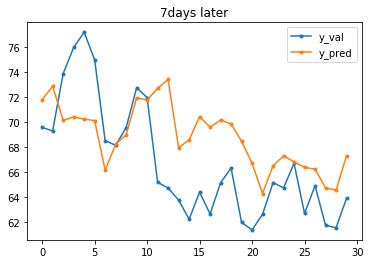

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.95362
[400]	valid_0's l1: 3.95021
[600]	valid_0's l1: 3.94932
[800]	valid_0's l1: 3.94874
[1000]	valid_0's l1: 3.9485
Early stopping, best iteration is:
[30]	valid_0's l1: 3.90618


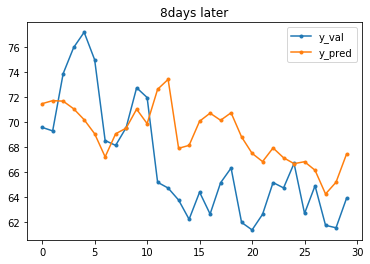

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.95455
[400]	valid_0's l1: 3.9528
[600]	valid_0's l1: 3.95235
[800]	valid_0's l1: 3.95054
[1000]	valid_0's l1: 3.94863
Early stopping, best iteration is:
[50]	valid_0's l1: 3.88381


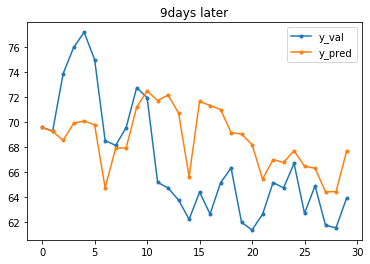

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.94531
[400]	valid_0's l1: 3.93667
[600]	valid_0's l1: 3.93257
[800]	valid_0's l1: 3.93043
[1000]	valid_0's l1: 3.92953
Early stopping, best iteration is:
[47]	valid_0's l1: 3.90668


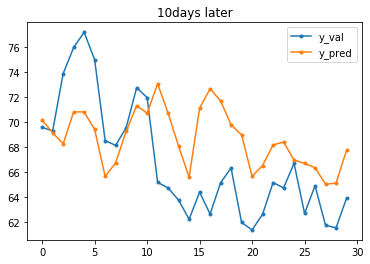

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.96375
[400]	valid_0's l1: 3.95406
[600]	valid_0's l1: 3.95288
[800]	valid_0's l1: 3.95227
[1000]	valid_0's l1: 3.95199
Early stopping, best iteration is:
[56]	valid_0's l1: 3.91032


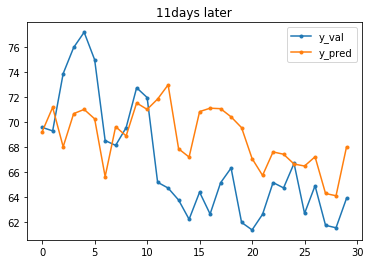

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.21743
[400]	valid_0's l1: 4.21804
[600]	valid_0's l1: 4.2182
[800]	valid_0's l1: 4.21817
[1000]	valid_0's l1: 4.21813
Early stopping, best iteration is:
[37]	valid_0's l1: 4.10677


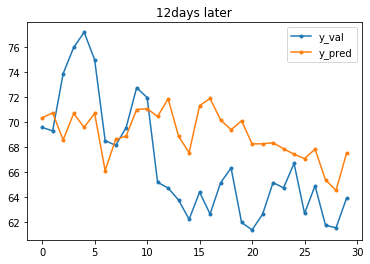

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.25829
[400]	valid_0's l1: 4.26407
[600]	valid_0's l1: 4.26463
[800]	valid_0's l1: 4.26492
[1000]	valid_0's l1: 4.26491
Early stopping, best iteration is:
[37]	valid_0's l1: 4.02494


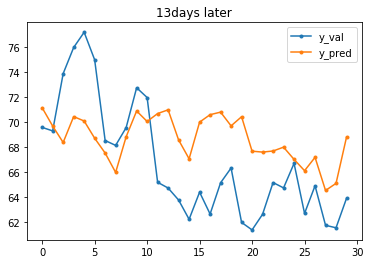

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.0045
[400]	valid_0's l1: 4.00801
[600]	valid_0's l1: 4.00818
[800]	valid_0's l1: 4.00758
[1000]	valid_0's l1: 4.00725
Early stopping, best iteration is:
[38]	valid_0's l1: 3.83635


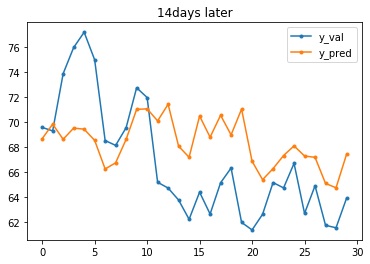

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.08158
[400]	valid_0's l1: 4.08628
[600]	valid_0's l1: 4.08523
[800]	valid_0's l1: 4.08492
[1000]	valid_0's l1: 4.08499
Early stopping, best iteration is:
[51]	valid_0's l1: 3.98171


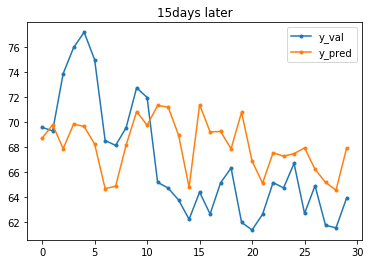

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.24911
[400]	valid_0's l1: 4.2548
[600]	valid_0's l1: 4.25661
[800]	valid_0's l1: 4.25746
[1000]	valid_0's l1: 4.25779
Early stopping, best iteration is:
[53]	valid_0's l1: 4.15358


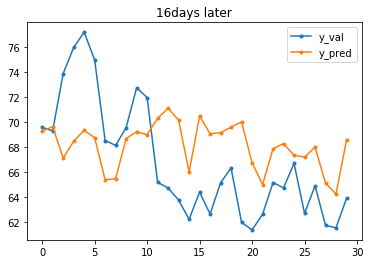

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.10988
[400]	valid_0's l1: 4.11325
[600]	valid_0's l1: 4.11327
[800]	valid_0's l1: 4.11324
[1000]	valid_0's l1: 4.11308
Early stopping, best iteration is:
[44]	valid_0's l1: 3.98347


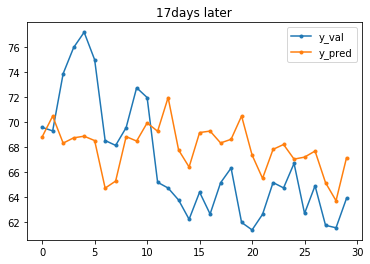

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.13696
[400]	valid_0's l1: 4.14197
[600]	valid_0's l1: 4.14231
[800]	valid_0's l1: 4.14177
[1000]	valid_0's l1: 4.14165
Early stopping, best iteration is:
[52]	valid_0's l1: 4.07251


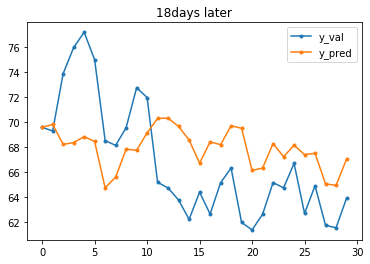

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.22951
[400]	valid_0's l1: 4.22884
[600]	valid_0's l1: 4.22794
[800]	valid_0's l1: 4.22805
[1000]	valid_0's l1: 4.22815
Early stopping, best iteration is:
[111]	valid_0's l1: 4.22251


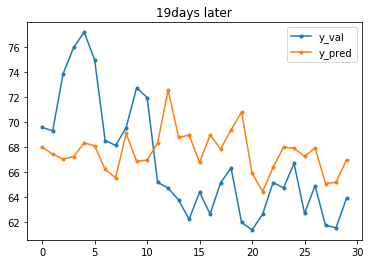

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.03602
[400]	valid_0's l1: 4.03926
[600]	valid_0's l1: 4.0386
[800]	valid_0's l1: 4.03863
[1000]	valid_0's l1: 4.0386
Early stopping, best iteration is:
[36]	valid_0's l1: 3.98253


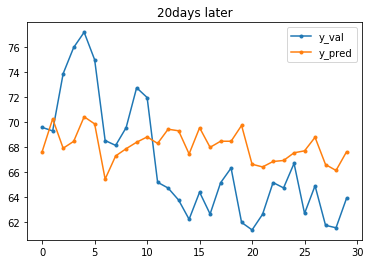

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.82678
[400]	valid_0's l1: 3.83007
[600]	valid_0's l1: 3.82998
[800]	valid_0's l1: 3.82967
[1000]	valid_0's l1: 3.82966
[1200]	valid_0's l1: 3.82967
Early stopping, best iteration is:
[218]	valid_0's l1: 3.82284


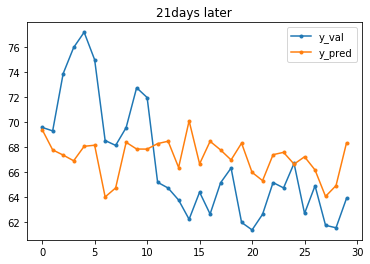

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.2748
[400]	valid_0's l1: 4.26355
[600]	valid_0's l1: 4.25751
[800]	valid_0's l1: 4.25543
[1000]	valid_0's l1: 4.25447
Early stopping, best iteration is:
[56]	valid_0's l1: 4.16932


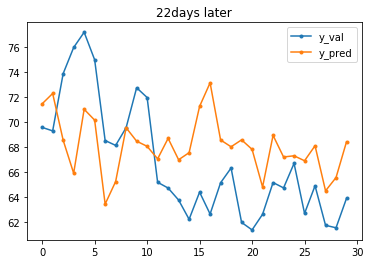

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.0347
[400]	valid_0's l1: 4.00264
[600]	valid_0's l1: 3.98531
[800]	valid_0's l1: 3.97841
[1000]	valid_0's l1: 3.97513
[1200]	valid_0's l1: 3.97363
[1400]	valid_0's l1: 3.97305
[1600]	valid_0's l1: 3.97271
[1800]	valid_0's l1: 3.97255
[2000]	valid_0's l1: 3.9725
Did not meet early stopping. Best iteration is:
[1995]	valid_0's l1: 3.9725


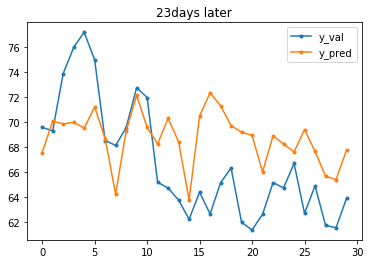

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 4.26217
[400]	valid_0's l1: 4.24249
[600]	valid_0's l1: 4.23743
[800]	valid_0's l1: 4.23703
[1000]	valid_0's l1: 4.23693
Early stopping, best iteration is:
[47]	valid_0's l1: 4.21536


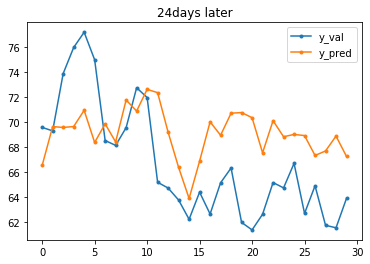

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.936
[400]	valid_0's l1: 3.91779
[600]	valid_0's l1: 3.9169
[800]	valid_0's l1: 3.9162
[1000]	valid_0's l1: 3.9161
Early stopping, best iteration is:
[48]	valid_0's l1: 3.88115


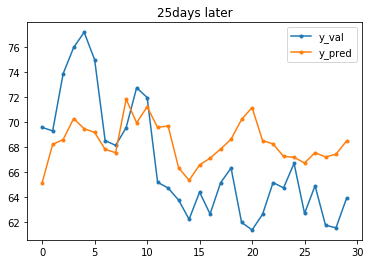

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.64082
[400]	valid_0's l1: 3.62213
[600]	valid_0's l1: 3.61787
[800]	valid_0's l1: 3.61691
[1000]	valid_0's l1: 3.61662
Early stopping, best iteration is:
[56]	valid_0's l1: 3.61498


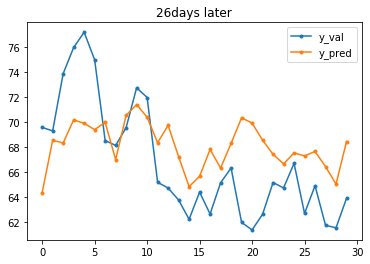

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.9729
[400]	valid_0's l1: 3.96204
[600]	valid_0's l1: 3.96107
[800]	valid_0's l1: 3.961
[1000]	valid_0's l1: 3.96098
Early stopping, best iteration is:
[50]	valid_0's l1: 3.92811


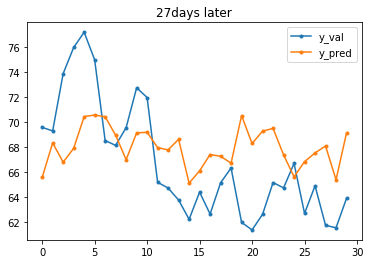

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.70662
[400]	valid_0's l1: 3.694
[600]	valid_0's l1: 3.69018
[800]	valid_0's l1: 3.68833
[1000]	valid_0's l1: 3.68725
Early stopping, best iteration is:
[34]	valid_0's l1: 3.68362


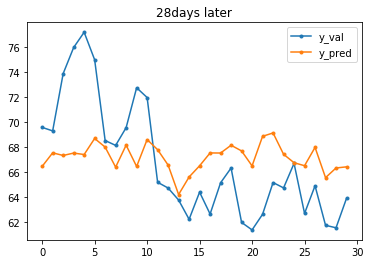

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.6161
[400]	valid_0's l1: 3.60372
[600]	valid_0's l1: 3.59848
[800]	valid_0's l1: 3.59579
[1000]	valid_0's l1: 3.59478
[1200]	valid_0's l1: 3.5944
[1400]	valid_0's l1: 3.59424
[1600]	valid_0's l1: 3.59416
[1800]	valid_0's l1: 3.59411
[2000]	valid_0's l1: 3.59408
Did not meet early stopping. Best iteration is:
[1995]	valid_0's l1: 3.59408


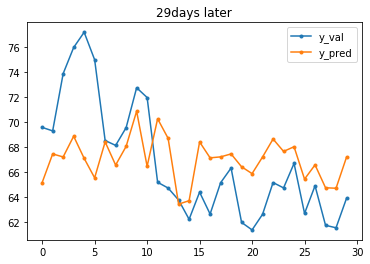

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.32908
[400]	valid_0's l1: 3.2974
[600]	valid_0's l1: 3.28721
[800]	valid_0's l1: 3.28269
[1000]	valid_0's l1: 3.28114
Early stopping, best iteration is:
[44]	valid_0's l1: 3.27026


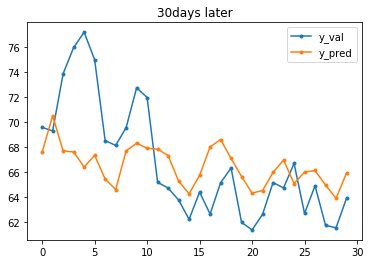

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.28051
[400]	valid_0's l1: 3.2836
[600]	valid_0's l1: 3.28501
[800]	valid_0's l1: 3.28539
[1000]	valid_0's l1: 3.28528
Early stopping, best iteration is:
[62]	valid_0's l1: 3.24327


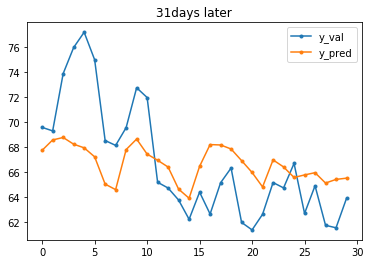

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.14953
[400]	valid_0's l1: 3.15498
[600]	valid_0's l1: 3.15594
[800]	valid_0's l1: 3.15749
[1000]	valid_0's l1: 3.15763
Early stopping, best iteration is:
[65]	valid_0's l1: 3.1132


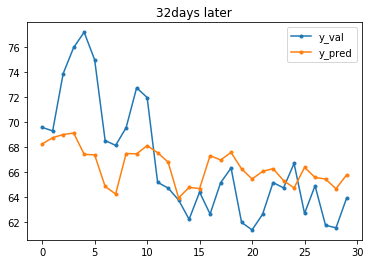

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 3.16084
[400]	valid_0's l1: 3.15881
[600]	valid_0's l1: 3.15857
[800]	valid_0's l1: 3.15868
[1000]	valid_0's l1: 3.15875
Early stopping, best iteration is:
[67]	valid_0's l1: 3.13225


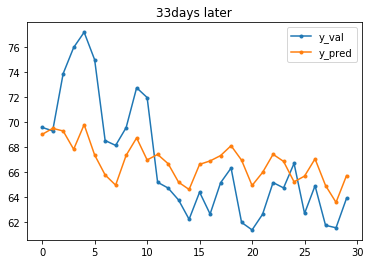

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.79896
[400]	valid_0's l1: 2.80415
[600]	valid_0's l1: 2.80563
[800]	valid_0's l1: 2.80607
[1000]	valid_0's l1: 2.80682
Early stopping, best iteration is:
[92]	valid_0's l1: 2.78337


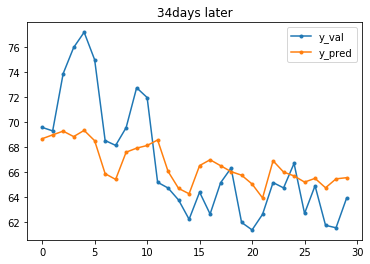

In [7]:
x_columns = ['ws_mean', 'humid_mean', 'landP_mean', 'seaP_mean', 'sfctemp_mean', \
             'stand_temp_max', 'stand_temp_min', 'stand_temp_mean', \
             'year', 'month', 'day', 'dayofweek']
y_columns = ['supply']
supply_models = {}
scores = []

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30 # 마지막 30일을 validation set으로 사용
    x_train, y_train = trans(target, 0, train_split, past, future, x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, x_columns, y_columns)

    supply_models[future] = create_model(x_train, y_train, x_val, y_val)
    
    pred = supply_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(supply_models[future].best_score)['valid_0']['l1']

    scores.append(score)
    print('==========================================================================')

In [8]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 3.789233743580159
min 2.7833689587350054
max 4.222505090514881


# Temp

In [9]:
temp_x_columns = ['temp_max', 'temp_min', 'temp_mean', \
                  'year', 'month', 'day']

## Max

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.90885
[400]	valid_0's l1: 1.90351
[600]	valid_0's l1: 1.90296
[800]	valid_0's l1: 1.90272
[1000]	valid_0's l1: 1.90258
Early stopping, best iteration is:
[17]	valid_0's l1: 1.77584


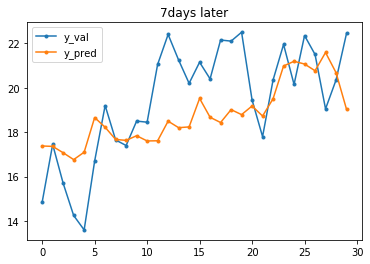

1.7758376585949578
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.88991
[400]	valid_0's l1: 1.88775
[600]	valid_0's l1: 1.88831
[800]	valid_0's l1: 1.88833
[1000]	valid_0's l1: 1.88835
Early stopping, best iteration is:
[57]	valid_0's l1: 1.88583


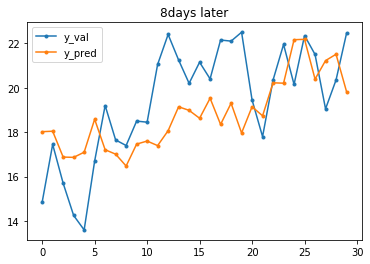

1.8858302993557312
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.02807
[400]	valid_0's l1: 2.03242
[600]	valid_0's l1: 2.03196
[800]	valid_0's l1: 2.03199
[1000]	valid_0's l1: 2.03212
Early stopping, best iteration is:
[22]	valid_0's l1: 1.80239


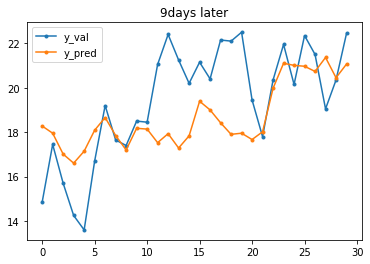

1.8023857442848998
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.1663
[400]	valid_0's l1: 2.17167
[600]	valid_0's l1: 2.17198
[800]	valid_0's l1: 2.17221
[1000]	valid_0's l1: 2.17224
Early stopping, best iteration is:
[10]	valid_0's l1: 1.87953


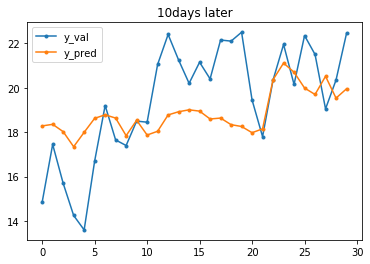

1.8795292650176563
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.32145
[400]	valid_0's l1: 2.32223
[600]	valid_0's l1: 2.32228
[800]	valid_0's l1: 2.32247
[1000]	valid_0's l1: 2.32239
Early stopping, best iteration is:
[6]	valid_0's l1: 1.91573


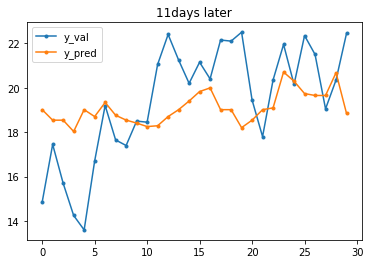

1.915727494621854
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.13367
[400]	valid_0's l1: 2.13496
[600]	valid_0's l1: 2.13421
[800]	valid_0's l1: 2.13396
[1000]	valid_0's l1: 2.13384
Early stopping, best iteration is:
[7]	valid_0's l1: 1.91549


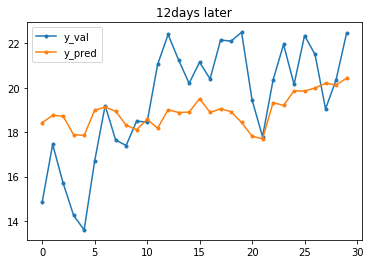

1.9154881570658016
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.95274
[400]	valid_0's l1: 1.9494
[600]	valid_0's l1: 1.94915
[800]	valid_0's l1: 1.94881
[1000]	valid_0's l1: 1.94863
Early stopping, best iteration is:
[10]	valid_0's l1: 1.74883


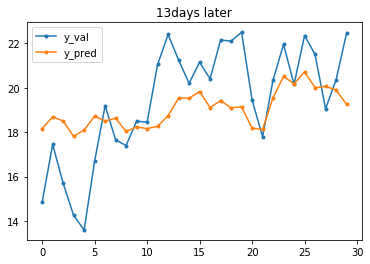

1.748832277124708
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.2274
[400]	valid_0's l1: 2.22538
[600]	valid_0's l1: 2.22427
[800]	valid_0's l1: 2.22436
[1000]	valid_0's l1: 2.22429
Early stopping, best iteration is:
[3]	valid_0's l1: 1.99134


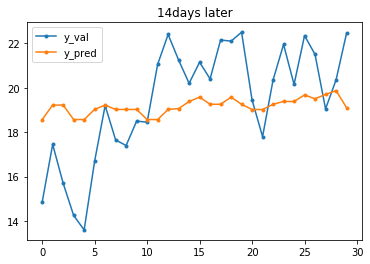

1.9913372596725158
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.09446
[400]	valid_0's l1: 2.09252
[600]	valid_0's l1: 2.0922
[800]	valid_0's l1: 2.09226
[1000]	valid_0's l1: 2.09218
Early stopping, best iteration is:
[18]	valid_0's l1: 1.89992


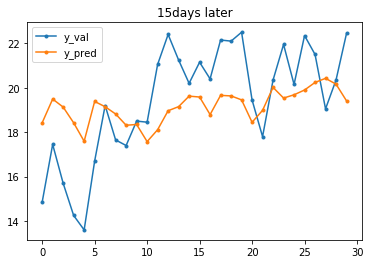

1.8999198126223036
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.35512
[400]	valid_0's l1: 2.35521
[600]	valid_0's l1: 2.35504
[800]	valid_0's l1: 2.35478
[1000]	valid_0's l1: 2.3545
Early stopping, best iteration is:
[4]	valid_0's l1: 1.97958


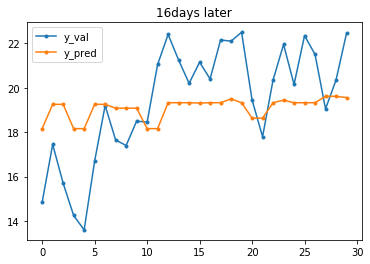

1.979581934480919
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.21674
[400]	valid_0's l1: 2.21908
[600]	valid_0's l1: 2.21852
[800]	valid_0's l1: 2.21832
[1000]	valid_0's l1: 2.21805
Early stopping, best iteration is:
[4]	valid_0's l1: 1.97927


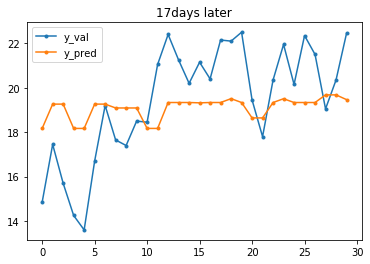

1.9792732977338052
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.21791
[400]	valid_0's l1: 2.22281
[600]	valid_0's l1: 2.2229
[800]	valid_0's l1: 2.22266
[1000]	valid_0's l1: 2.22273
Early stopping, best iteration is:
[4]	valid_0's l1: 2.01939


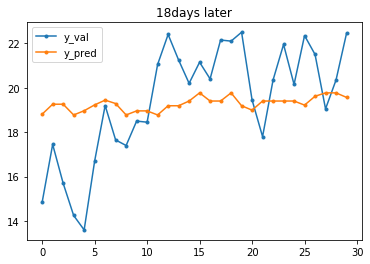

2.019388893467308
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.16109
[400]	valid_0's l1: 2.16178
[600]	valid_0's l1: 2.16114
[800]	valid_0's l1: 2.16097
[1000]	valid_0's l1: 2.16106
Early stopping, best iteration is:
[8]	valid_0's l1: 1.87048


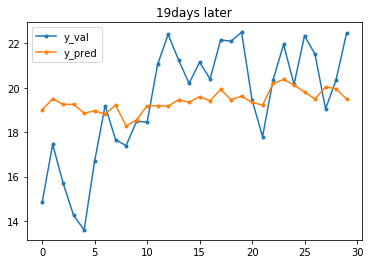

1.870479565313596
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.12923
[400]	valid_0's l1: 2.13267
[600]	valid_0's l1: 2.13286
[800]	valid_0's l1: 2.13287
[1000]	valid_0's l1: 2.13282
Early stopping, best iteration is:
[24]	valid_0's l1: 1.97624


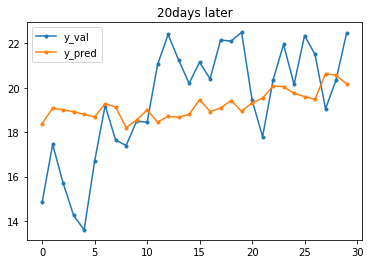

1.9762449901825718
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.96697
[400]	valid_0's l1: 1.96169
[600]	valid_0's l1: 1.96248
[800]	valid_0's l1: 1.9626
[1000]	valid_0's l1: 1.96277
Early stopping, best iteration is:
[23]	valid_0's l1: 1.84103


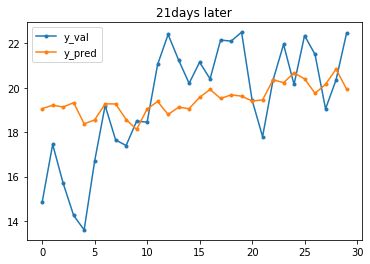

1.8410260202891673
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.89309
[400]	valid_0's l1: 1.89245
[600]	valid_0's l1: 1.89286
[800]	valid_0's l1: 1.89284
[1000]	valid_0's l1: 1.8926
Early stopping, best iteration is:
[34]	valid_0's l1: 1.85767


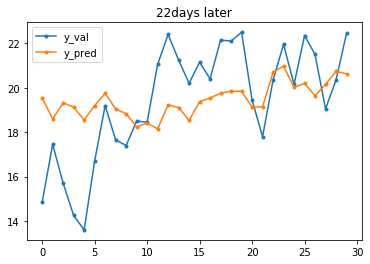

1.8576662500681775
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.87928
[400]	valid_0's l1: 1.8844
[600]	valid_0's l1: 1.88518
[800]	valid_0's l1: 1.88547
[1000]	valid_0's l1: 1.88567
Early stopping, best iteration is:
[43]	valid_0's l1: 1.75354


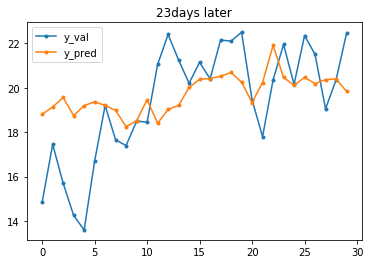

1.753535317716492
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.76396
[400]	valid_0's l1: 1.76301
[600]	valid_0's l1: 1.76252
[800]	valid_0's l1: 1.76231
[1000]	valid_0's l1: 1.76249
Early stopping, best iteration is:
[15]	valid_0's l1: 1.73062


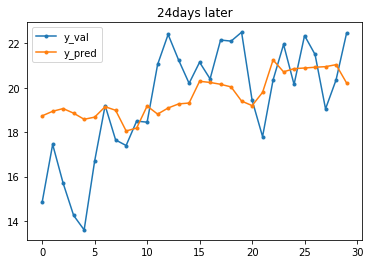

1.7306186582576422
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.80168
[400]	valid_0's l1: 1.80478
[600]	valid_0's l1: 1.80811
[800]	valid_0's l1: 1.80939
[1000]	valid_0's l1: 1.81002
Early stopping, best iteration is:
[52]	valid_0's l1: 1.75693


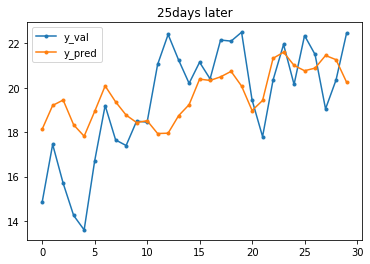

1.756934076257803
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.92302
[400]	valid_0's l1: 1.93345
[600]	valid_0's l1: 1.93941
[800]	valid_0's l1: 1.94105
[1000]	valid_0's l1: 1.94188
Early stopping, best iteration is:
[15]	valid_0's l1: 1.78768


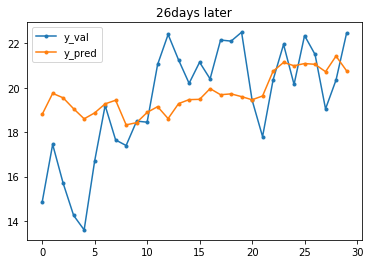

1.7876772699157328
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.86541
[400]	valid_0's l1: 1.89036
[600]	valid_0's l1: 1.89635
[800]	valid_0's l1: 1.89828
[1000]	valid_0's l1: 1.89956
Early stopping, best iteration is:
[47]	valid_0's l1: 1.81523


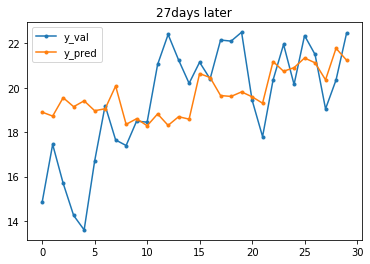

1.8152274360405023
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.77716
[400]	valid_0's l1: 1.77981
[600]	valid_0's l1: 1.78027
[800]	valid_0's l1: 1.78032
[1000]	valid_0's l1: 1.78019
Early stopping, best iteration is:
[61]	valid_0's l1: 1.72576


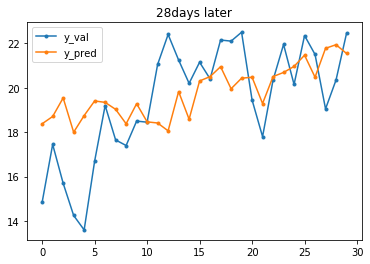

1.725756197122883
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.66633
[400]	valid_0's l1: 1.65723
[600]	valid_0's l1: 1.6564
[800]	valid_0's l1: 1.65628
[1000]	valid_0's l1: 1.65632
[1200]	valid_0's l1: 1.65628
[1400]	valid_0's l1: 1.65626
Early stopping, best iteration is:
[498]	valid_0's l1: 1.65619


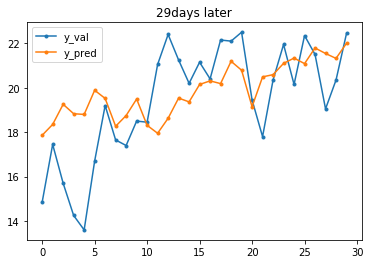

1.6561904456419174
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.81307
[400]	valid_0's l1: 1.81125
[600]	valid_0's l1: 1.80964
[800]	valid_0's l1: 1.80953
[1000]	valid_0's l1: 1.80952
Early stopping, best iteration is:
[35]	valid_0's l1: 1.8011


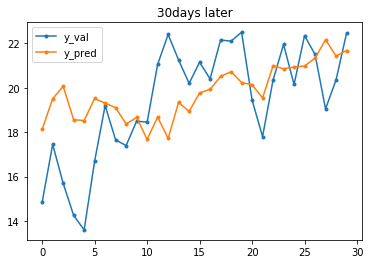

1.801099733994714
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.85053
[400]	valid_0's l1: 1.84533
[600]	valid_0's l1: 1.84385
[800]	valid_0's l1: 1.84328
[1000]	valid_0's l1: 1.84318
[1200]	valid_0's l1: 1.84313
[1400]	valid_0's l1: 1.8431
[1600]	valid_0's l1: 1.84312
[1800]	valid_0's l1: 1.84312
[2000]	valid_0's l1: 1.84313
Did not meet early stopping. Best iteration is:
[1312]	valid_0's l1: 1.84309


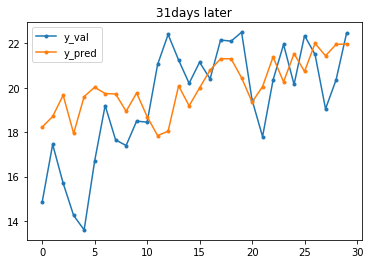

1.8430888525381235
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.72499
[400]	valid_0's l1: 1.719
[600]	valid_0's l1: 1.71793
[800]	valid_0's l1: 1.71753
[1000]	valid_0's l1: 1.71714
[1200]	valid_0's l1: 1.71689
[1400]	valid_0's l1: 1.71681
[1600]	valid_0's l1: 1.71672
[1800]	valid_0's l1: 1.7167
[2000]	valid_0's l1: 1.71669
Did not meet early stopping. Best iteration is:
[1999]	valid_0's l1: 1.71668


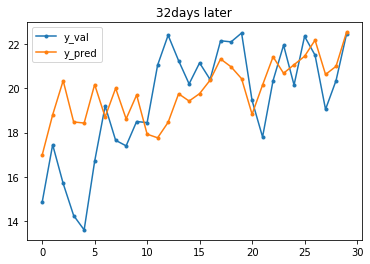

1.7166849482217066
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.82566
[400]	valid_0's l1: 1.8229
[600]	valid_0's l1: 1.82338
[800]	valid_0's l1: 1.82283
[1000]	valid_0's l1: 1.82236
Early stopping, best iteration is:
[30]	valid_0's l1: 1.74133


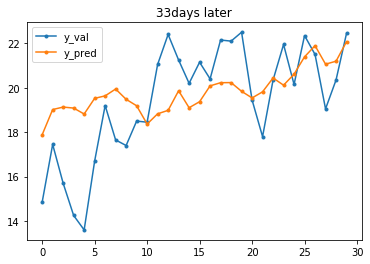

1.7413344673177054
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.83853
[400]	valid_0's l1: 1.83177
[600]	valid_0's l1: 1.82952
[800]	valid_0's l1: 1.82835
[1000]	valid_0's l1: 1.82777
Early stopping, best iteration is:
[17]	valid_0's l1: 1.80163


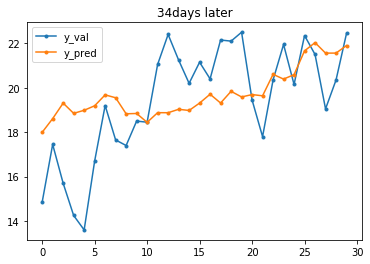

1.801631146399277


In [10]:
y_columns = ['temp_max']
temp_max_models = {}
scores = list()

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, temp_x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, temp_x_columns, y_columns)
    
    temp_max_models[future] = create_model(x_train, y_train, x_val, y_val)
        
    pred = temp_max_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(temp_max_models[future].best_score)['valid_0']['l1']

    scores.append(score)
    print(score)
    print('==========================================================================')

In [11]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.8381545524757306
min 1.6561904456419174
max 2.019388893467308


## temp min

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.36771
[400]	valid_0's l1: 2.36461
[600]	valid_0's l1: 2.36447
[800]	valid_0's l1: 2.36432
[1000]	valid_0's l1: 2.36425
Early stopping, best iteration is:
[12]	valid_0's l1: 2.17241


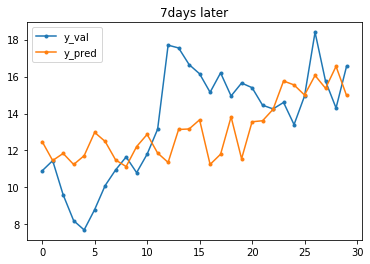

1.7758376585949578
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.28462
[400]	valid_0's l1: 2.27495
[600]	valid_0's l1: 2.27292
[800]	valid_0's l1: 2.27198
[1000]	valid_0's l1: 2.27174
Early stopping, best iteration is:
[8]	valid_0's l1: 2.13409


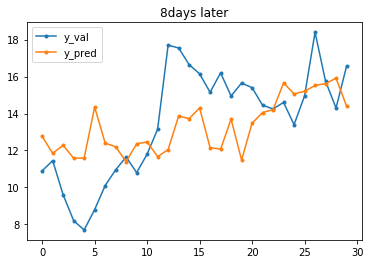

1.8858302993557312
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.23727
[400]	valid_0's l1: 2.2372
[600]	valid_0's l1: 2.23525
[800]	valid_0's l1: 2.23517
[1000]	valid_0's l1: 2.23497
Early stopping, best iteration is:
[27]	valid_0's l1: 2.05279


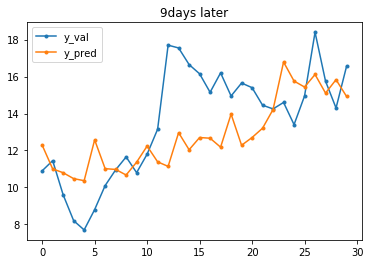

1.8023857442848998
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.26942
[400]	valid_0's l1: 2.26617
[600]	valid_0's l1: 2.26669
[800]	valid_0's l1: 2.26695
[1000]	valid_0's l1: 2.26745
Early stopping, best iteration is:
[15]	valid_0's l1: 2.0982


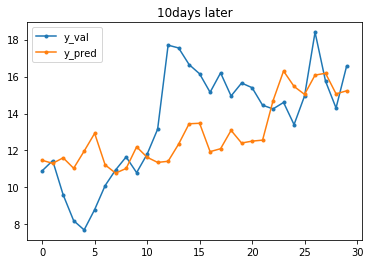

1.8795292650176563
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.34266
[400]	valid_0's l1: 2.34155
[600]	valid_0's l1: 2.34189
[800]	valid_0's l1: 2.3423
[1000]	valid_0's l1: 2.34289
Early stopping, best iteration is:
[6]	valid_0's l1: 2.13879


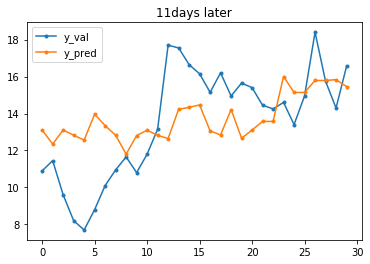

1.915727494621854
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.28852
[400]	valid_0's l1: 2.29292
[600]	valid_0's l1: 2.29173
[800]	valid_0's l1: 2.29231
[1000]	valid_0's l1: 2.29228
Early stopping, best iteration is:
[24]	valid_0's l1: 2.11143


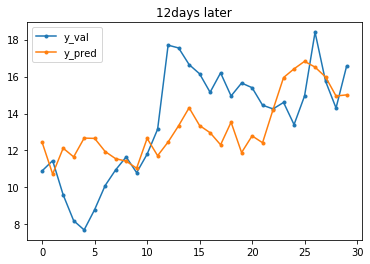

1.9154881570658016
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.39236
[400]	valid_0's l1: 2.38872
[600]	valid_0's l1: 2.39068
[800]	valid_0's l1: 2.39129
[1000]	valid_0's l1: 2.3913
Early stopping, best iteration is:
[14]	valid_0's l1: 2.17872


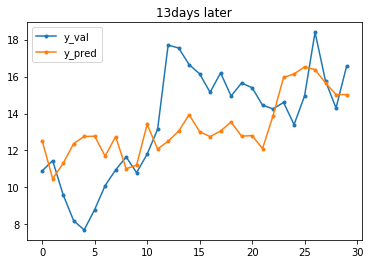

1.748832277124708
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.6857
[400]	valid_0's l1: 2.68367
[600]	valid_0's l1: 2.6835
[800]	valid_0's l1: 2.68412
[1000]	valid_0's l1: 2.68432
Early stopping, best iteration is:
[13]	valid_0's l1: 2.15266


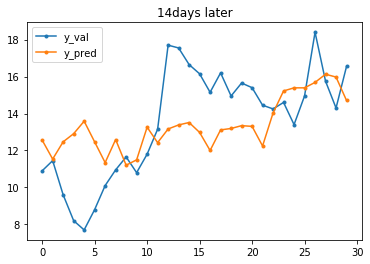

1.9913372596725158
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.20702
[400]	valid_0's l1: 2.20414
[600]	valid_0's l1: 2.20249
[800]	valid_0's l1: 2.20148
[1000]	valid_0's l1: 2.2018
Early stopping, best iteration is:
[13]	valid_0's l1: 2.16634


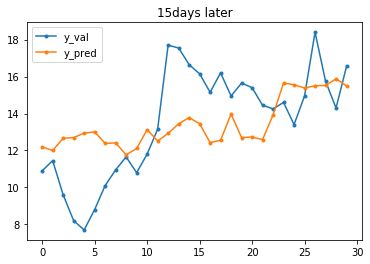

1.8999198126223036
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.36326
[400]	valid_0's l1: 2.36544
[600]	valid_0's l1: 2.36437
[800]	valid_0's l1: 2.3643
[1000]	valid_0's l1: 2.36421
Early stopping, best iteration is:
[12]	valid_0's l1: 2.04676


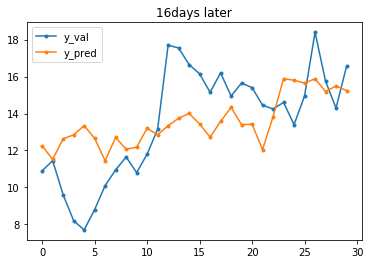

1.979581934480919
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.33042
[400]	valid_0's l1: 2.32611
[600]	valid_0's l1: 2.32533
[800]	valid_0's l1: 2.32564
[1000]	valid_0's l1: 2.3254
Early stopping, best iteration is:
[22]	valid_0's l1: 2.18546


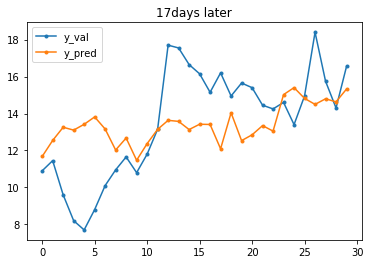

1.9792732977338052
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.48013
[400]	valid_0's l1: 2.48247
[600]	valid_0's l1: 2.48231
[800]	valid_0's l1: 2.48249
[1000]	valid_0's l1: 2.48264
Early stopping, best iteration is:
[15]	valid_0's l1: 2.3839


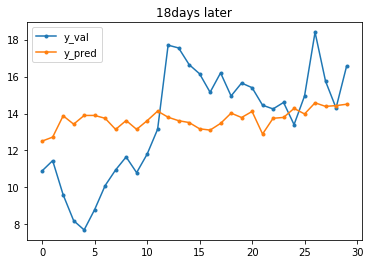

2.019388893467308
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.47054
[400]	valid_0's l1: 2.46777
[600]	valid_0's l1: 2.46951
[800]	valid_0's l1: 2.47053
[1000]	valid_0's l1: 2.47062
Early stopping, best iteration is:
[18]	valid_0's l1: 2.30264


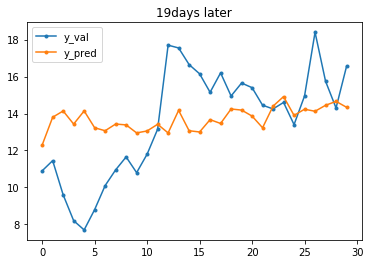

1.870479565313596
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.50388
[400]	valid_0's l1: 2.50383
[600]	valid_0's l1: 2.50505
[800]	valid_0's l1: 2.50603
[1000]	valid_0's l1: 2.50602
Early stopping, best iteration is:
[10]	valid_0's l1: 2.35557


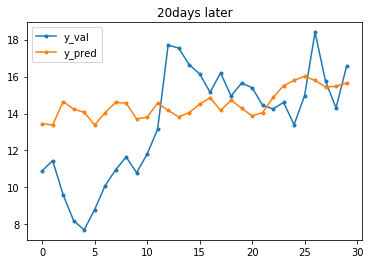

1.9762449901825718
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.40438
[400]	valid_0's l1: 2.40737
[600]	valid_0's l1: 2.40803
[800]	valid_0's l1: 2.40897
[1000]	valid_0's l1: 2.40957
Early stopping, best iteration is:
[19]	valid_0's l1: 2.26582


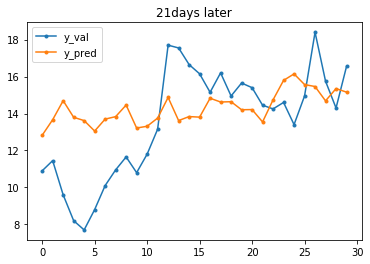

1.8410260202891673
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.44328
[400]	valid_0's l1: 2.44432
[600]	valid_0's l1: 2.44617
[800]	valid_0's l1: 2.44591
[1000]	valid_0's l1: 2.44651
Early stopping, best iteration is:
[13]	valid_0's l1: 2.35218


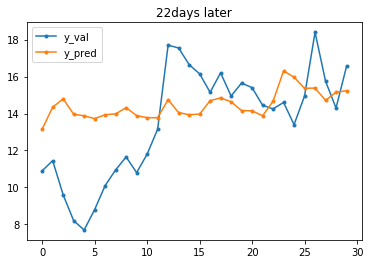

1.8576662500681775
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.27124
[400]	valid_0's l1: 2.27592
[600]	valid_0's l1: 2.27753
[800]	valid_0's l1: 2.27814
[1000]	valid_0's l1: 2.27887
Early stopping, best iteration is:
[18]	valid_0's l1: 2.24784


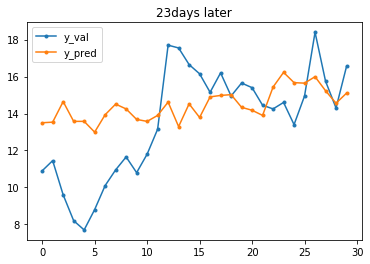

1.753535317716492
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.28227
[400]	valid_0's l1: 2.28449
[600]	valid_0's l1: 2.28717
[800]	valid_0's l1: 2.28679
[1000]	valid_0's l1: 2.28708
Early stopping, best iteration is:
[184]	valid_0's l1: 2.27848


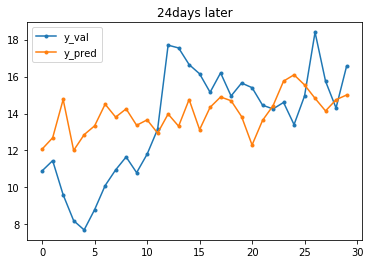

1.7306186582576422
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.36229
[400]	valid_0's l1: 2.36845
[600]	valid_0's l1: 2.37058
[800]	valid_0's l1: 2.37139
[1000]	valid_0's l1: 2.37133
Early stopping, best iteration is:
[30]	valid_0's l1: 2.26903


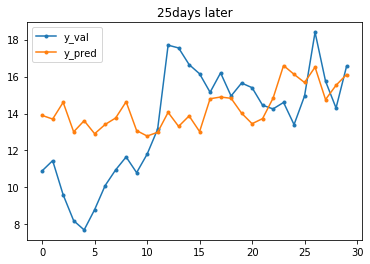

1.756934076257803
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.41881
[400]	valid_0's l1: 2.42351
[600]	valid_0's l1: 2.42483
[800]	valid_0's l1: 2.42486
[1000]	valid_0's l1: 2.42502
Early stopping, best iteration is:
[12]	valid_0's l1: 2.28051


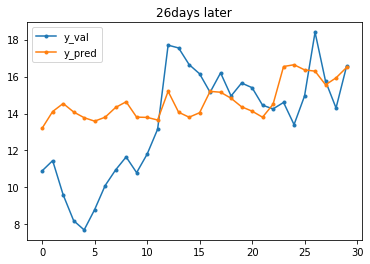

1.7876772699157328
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.25282
[400]	valid_0's l1: 2.25421
[600]	valid_0's l1: 2.25636
[800]	valid_0's l1: 2.25687
[1000]	valid_0's l1: 2.25697
Early stopping, best iteration is:
[9]	valid_0's l1: 2.23315


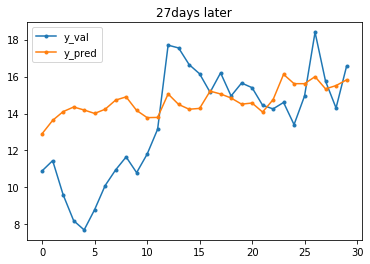

1.8152274360405023
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.26114
[400]	valid_0's l1: 2.2556
[600]	valid_0's l1: 2.25467
[800]	valid_0's l1: 2.25486
[1000]	valid_0's l1: 2.25515
Early stopping, best iteration is:
[11]	valid_0's l1: 2.20621


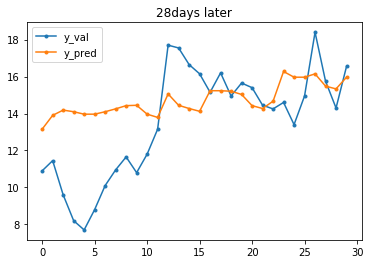

1.725756197122883
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.12358
[400]	valid_0's l1: 2.11917
[600]	valid_0's l1: 2.12088
[800]	valid_0's l1: 2.12177
[1000]	valid_0's l1: 2.12156
[1200]	valid_0's l1: 2.12149
Early stopping, best iteration is:
[327]	valid_0's l1: 2.11865


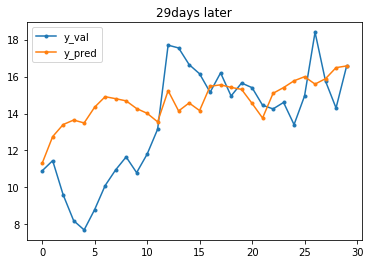

1.6561904456419174
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.19583
[400]	valid_0's l1: 2.19259
[600]	valid_0's l1: 2.1923
[800]	valid_0's l1: 2.19236
[1000]	valid_0's l1: 2.19244
Early stopping, best iteration is:
[17]	valid_0's l1: 2.17132


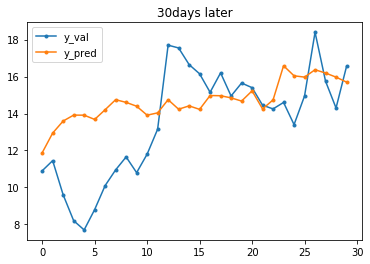

1.801099733994714
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.04136
[400]	valid_0's l1: 2.03512
[600]	valid_0's l1: 2.03383
[800]	valid_0's l1: 2.03422
[1000]	valid_0's l1: 2.03409
Early stopping, best iteration is:
[102]	valid_0's l1: 2.02174


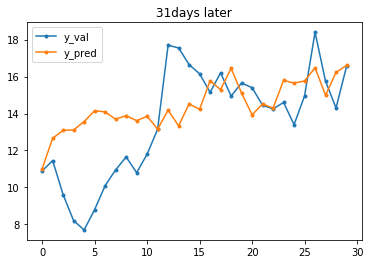

1.8430888525381235
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.21931
[400]	valid_0's l1: 2.21848
[600]	valid_0's l1: 2.2197
[800]	valid_0's l1: 2.22003
[1000]	valid_0's l1: 2.22014
Early stopping, best iteration is:
[57]	valid_0's l1: 2.17887


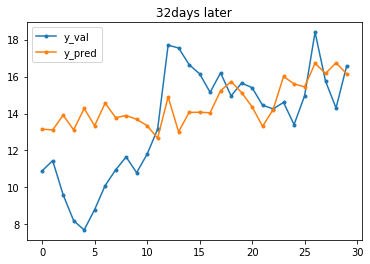

1.7166849482217066
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.09081
[400]	valid_0's l1: 2.09004
[600]	valid_0's l1: 2.09103
[800]	valid_0's l1: 2.09125
[1000]	valid_0's l1: 2.09129
Early stopping, best iteration is:
[35]	valid_0's l1: 2.08008


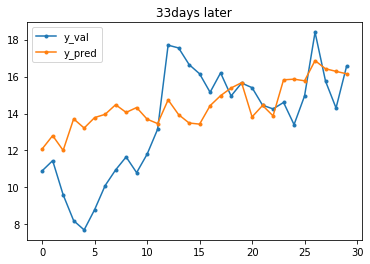

1.7413344673177054
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.17867
[400]	valid_0's l1: 2.17784
[600]	valid_0's l1: 2.17812
[800]	valid_0's l1: 2.1785
[1000]	valid_0's l1: 2.17834
Early stopping, best iteration is:
[42]	valid_0's l1: 2.12599


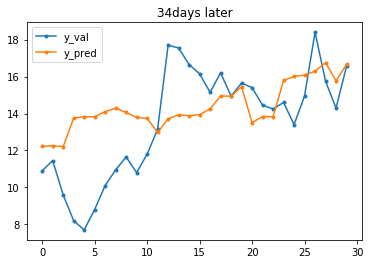

1.801631146399277


In [12]:
y_columns = ['temp_min']
temp_min_models = {}
scores = list()

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, temp_x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, temp_x_columns, y_columns)
    
    temp_min_models[future] = create_model(x_train, y_train, x_val, y_val)
        
    pred = temp_min_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(temp_max_models[future].best_score)['valid_0']['l1']

    scores.append(score)
    print(score)
    print('==========================================================================')

In [13]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.8381545524757306
min 1.6561904456419174
max 2.019388893467308


# temp mean

Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.03998
[400]	valid_0's l1: 2.03905
[600]	valid_0's l1: 2.03844
[800]	valid_0's l1: 2.03777
[1000]	valid_0's l1: 2.03766
Early stopping, best iteration is:
[5]	valid_0's l1: 1.89365


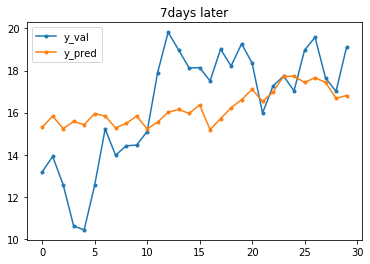

1.7758376585949578
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.10629
[400]	valid_0's l1: 2.10542
[600]	valid_0's l1: 2.10483
[800]	valid_0's l1: 2.10456
[1000]	valid_0's l1: 2.10454
Early stopping, best iteration is:
[18]	valid_0's l1: 2.04559


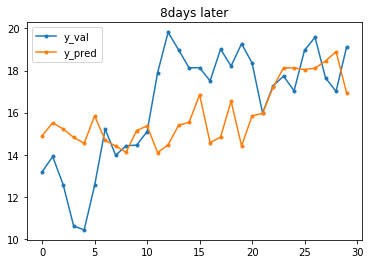

1.8858302993557312
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.18767
[400]	valid_0's l1: 2.18333
[600]	valid_0's l1: 2.18274
[800]	valid_0's l1: 2.18269
[1000]	valid_0's l1: 2.18268
Early stopping, best iteration is:
[21]	valid_0's l1: 1.85341


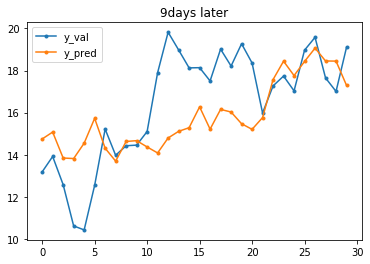

1.8023857442848998
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.22448
[400]	valid_0's l1: 2.23062
[600]	valid_0's l1: 2.23043
[800]	valid_0's l1: 2.23046
[1000]	valid_0's l1: 2.23047
Early stopping, best iteration is:
[19]	valid_0's l1: 1.94741


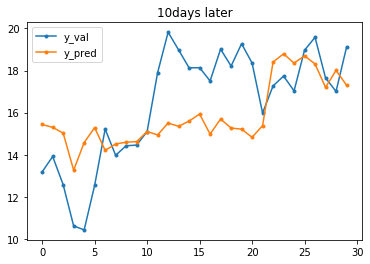

1.8795292650176563
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.17629
[400]	valid_0's l1: 2.1791
[600]	valid_0's l1: 2.17885
[800]	valid_0's l1: 2.17856
[1000]	valid_0's l1: 2.17849
Early stopping, best iteration is:
[10]	valid_0's l1: 2.00154


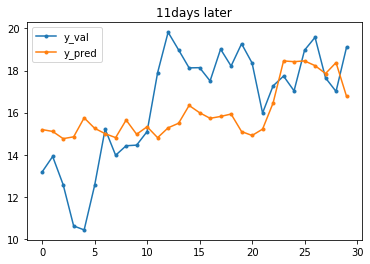

1.915727494621854
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.039
[400]	valid_0's l1: 2.0332
[600]	valid_0's l1: 2.03383
[800]	valid_0's l1: 2.03448
[1000]	valid_0's l1: 2.03507
Early stopping, best iteration is:
[6]	valid_0's l1: 1.89672


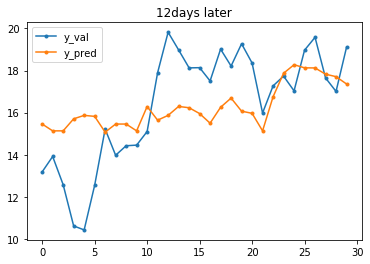

1.9154881570658016
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.9858
[400]	valid_0's l1: 1.98859
[600]	valid_0's l1: 1.98868
[800]	valid_0's l1: 1.98877
[1000]	valid_0's l1: 1.98872
Early stopping, best iteration is:
[6]	valid_0's l1: 1.90068


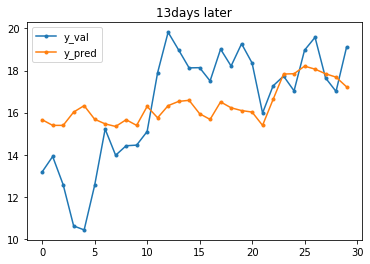

1.748832277124708
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.29986
[400]	valid_0's l1: 2.30696
[600]	valid_0's l1: 2.30815
[800]	valid_0's l1: 2.30841
[1000]	valid_0's l1: 2.30844
Early stopping, best iteration is:
[7]	valid_0's l1: 1.99522


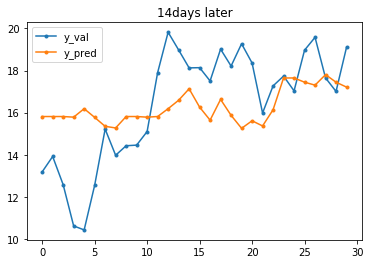

1.9913372596725158
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.43531
[400]	valid_0's l1: 2.43395
[600]	valid_0's l1: 2.43462
[800]	valid_0's l1: 2.43471
[1000]	valid_0's l1: 2.4345
Early stopping, best iteration is:
[5]	valid_0's l1: 1.97339


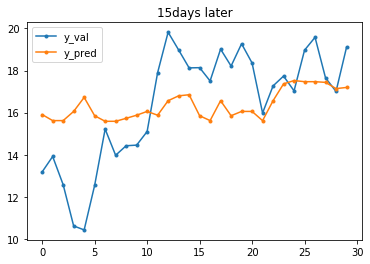

1.8999198126223036
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.35779
[400]	valid_0's l1: 2.35864
[600]	valid_0's l1: 2.3595
[800]	valid_0's l1: 2.35956
[1000]	valid_0's l1: 2.35966
Early stopping, best iteration is:
[9]	valid_0's l1: 1.96695


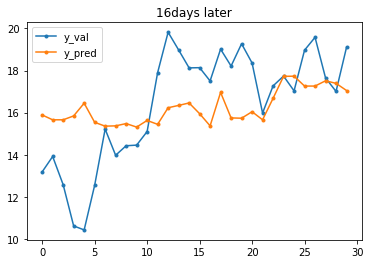

1.979581934480919
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.37585
[400]	valid_0's l1: 2.38005
[600]	valid_0's l1: 2.38059
[800]	valid_0's l1: 2.38157
[1000]	valid_0's l1: 2.38183
Early stopping, best iteration is:
[3]	valid_0's l1: 2.02653


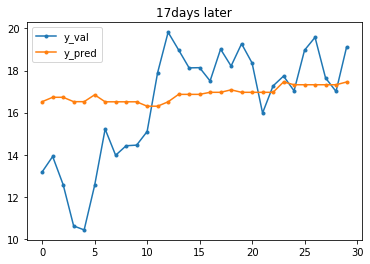

1.9792732977338052
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.32477
[400]	valid_0's l1: 2.32936
[600]	valid_0's l1: 2.32972
[800]	valid_0's l1: 2.33023
[1000]	valid_0's l1: 2.33039
Early stopping, best iteration is:
[18]	valid_0's l1: 2.05562


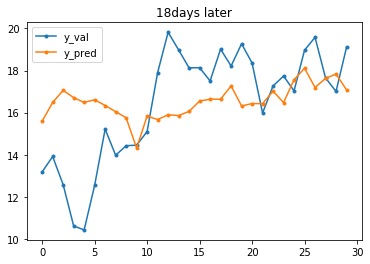

2.019388893467308
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.44555
[400]	valid_0's l1: 2.44597
[600]	valid_0's l1: 2.44469
[800]	valid_0's l1: 2.44367
[1000]	valid_0's l1: 2.44335
Early stopping, best iteration is:
[3]	valid_0's l1: 2.12869


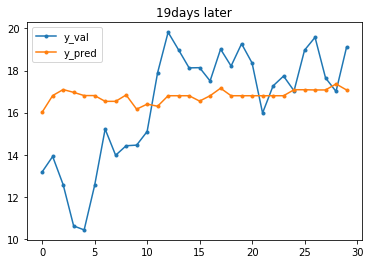

1.870479565313596
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.241
[400]	valid_0's l1: 2.24357
[600]	valid_0's l1: 2.24316
[800]	valid_0's l1: 2.24344
[1000]	valid_0's l1: 2.24428
Early stopping, best iteration is:
[7]	valid_0's l1: 2.07483


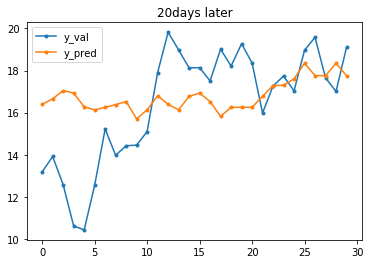

1.9762449901825718
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.1145
[400]	valid_0's l1: 2.1149
[600]	valid_0's l1: 2.11217
[800]	valid_0's l1: 2.10929
[1000]	valid_0's l1: 2.10856
Early stopping, best iteration is:
[25]	valid_0's l1: 2.02365


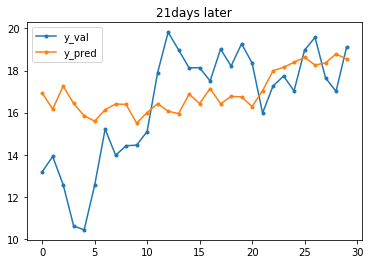

1.8410260202891673
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.11223
[400]	valid_0's l1: 2.10783
[600]	valid_0's l1: 2.10595
[800]	valid_0's l1: 2.10589
[1000]	valid_0's l1: 2.10646
Early stopping, best iteration is:
[15]	valid_0's l1: 2.01179


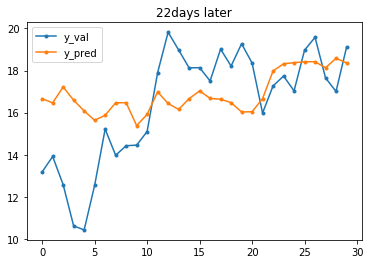

1.8576662500681775
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.06499
[400]	valid_0's l1: 2.06142
[600]	valid_0's l1: 2.0607
[800]	valid_0's l1: 2.06079
[1000]	valid_0's l1: 2.06119
Early stopping, best iteration is:
[13]	valid_0's l1: 2.00322


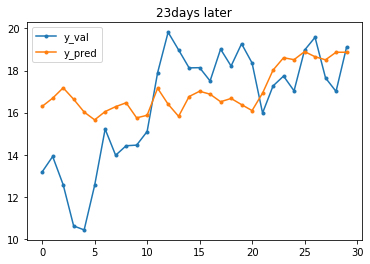

1.753535317716492
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.01261
[400]	valid_0's l1: 2.02462
[600]	valid_0's l1: 2.03003
[800]	valid_0's l1: 2.0333
[1000]	valid_0's l1: 2.03455
Early stopping, best iteration is:
[12]	valid_0's l1: 1.97194


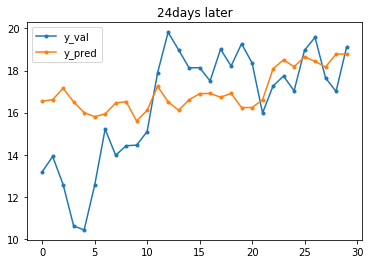

1.7306186582576422
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.95617
[400]	valid_0's l1: 1.97524
[600]	valid_0's l1: 1.98725
[800]	valid_0's l1: 1.99244
[1000]	valid_0's l1: 1.9944
Early stopping, best iteration is:
[43]	valid_0's l1: 1.87403


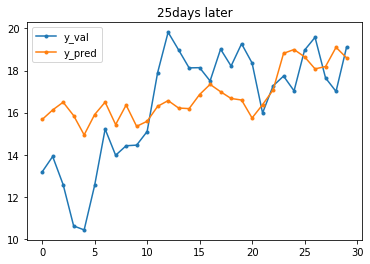

1.756934076257803
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.99717
[400]	valid_0's l1: 1.99566
[600]	valid_0's l1: 1.99489
[800]	valid_0's l1: 1.99423
[1000]	valid_0's l1: 1.99411
Early stopping, best iteration is:
[41]	valid_0's l1: 1.91708


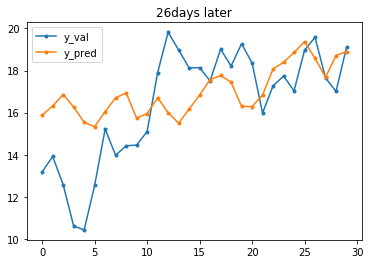

1.7876772699157328
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.0657
[400]	valid_0's l1: 2.06063
[600]	valid_0's l1: 2.05962
[800]	valid_0's l1: 2.05943
[1000]	valid_0's l1: 2.05967
Early stopping, best iteration is:
[11]	valid_0's l1: 1.96395


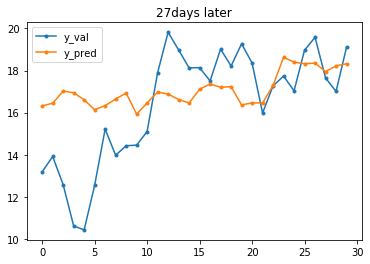

1.8152274360405023
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.89884
[400]	valid_0's l1: 1.89512
[600]	valid_0's l1: 1.89377
[800]	valid_0's l1: 1.89333
[1000]	valid_0's l1: 1.89305
Early stopping, best iteration is:
[31]	valid_0's l1: 1.87455


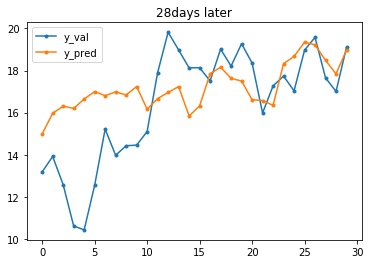

1.725756197122883
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 1.9954
[400]	valid_0's l1: 1.99009
[600]	valid_0's l1: 1.98821
[800]	valid_0's l1: 1.9872
[1000]	valid_0's l1: 1.98683
Early stopping, best iteration is:
[31]	valid_0's l1: 1.96058


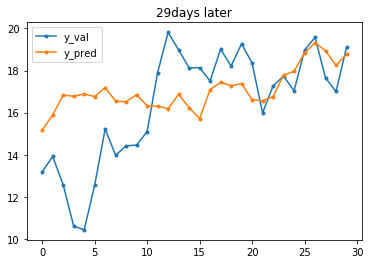

1.6561904456419174
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.12081
[400]	valid_0's l1: 2.11484
[600]	valid_0's l1: 2.11302
[800]	valid_0's l1: 2.11275
[1000]	valid_0's l1: 2.11247
Early stopping, best iteration is:
[19]	valid_0's l1: 2.00206


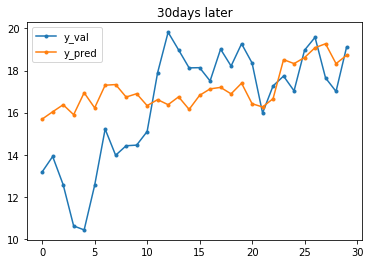

1.801099733994714
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.08149
[400]	valid_0's l1: 2.08309
[600]	valid_0's l1: 2.08182
[800]	valid_0's l1: 2.08102
[1000]	valid_0's l1: 2.08069
Early stopping, best iteration is:
[40]	valid_0's l1: 1.95796


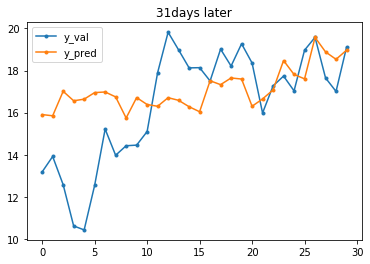

1.8430888525381235
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.0446
[400]	valid_0's l1: 2.04301
[600]	valid_0's l1: 2.04173
[800]	valid_0's l1: 2.04151
[1000]	valid_0's l1: 2.04103
Early stopping, best iteration is:
[84]	valid_0's l1: 2.02402


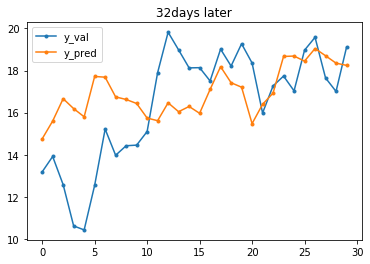

1.7166849482217066
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.03118
[400]	valid_0's l1: 2.03086
[600]	valid_0's l1: 2.02989
[800]	valid_0's l1: 2.02933
[1000]	valid_0's l1: 2.02928
Early stopping, best iteration is:
[58]	valid_0's l1: 1.9918


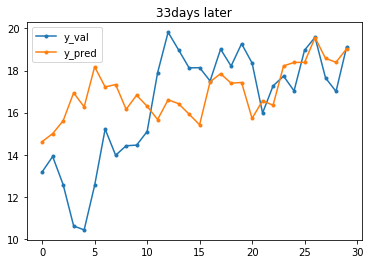

1.7413344673177054
Training until validation scores don't improve for 1000 rounds
[200]	valid_0's l1: 2.12823
[400]	valid_0's l1: 2.12592
[600]	valid_0's l1: 2.12487
[800]	valid_0's l1: 2.12503
[1000]	valid_0's l1: 2.12565
Early stopping, best iteration is:
[43]	valid_0's l1: 2.119


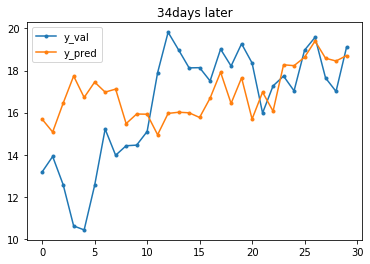

1.801631146399277


In [15]:
y_columns = ['temp_mean']
temp_mean_models = {}
scores = []

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, temp_x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, temp_x_columns, y_columns)
    
    temp_mean_models[future] = create_model(x_train, y_train, x_val, y_val)
        
    pred = temp_mean_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(temp_max_models[future].best_score)['valid_0']['l1']

    scores.append(score)
    print(score)
    print('==========================================================================')

In [16]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.8381545524757306
min 1.6561904456419174
max 2.019388893467308


### 'ws_mean', 'humid_mean', 'landP_mean', 'seaP_mean', 'sfctemp_mean'

# WS

In [37]:
ws_x_columns = ['ws_max', 'ws_min', 'ws_mean', \
#                 'temp_max', 'temp_min', 'temp_mean', \
                  'year', 'month', 'day']

In [52]:
def ws_model(x_train, y_train, x_val, y_val):
    params = {
        'metric': 'mae',
        'seed':7777,
        'learning_rate': 0.02
        }
    
    d_train = lgb.Dataset(x_train, y_train)
    d_val = lgb.Dataset(x_val, y_val)

    model = lgb.train(params, d_train, 2000, \
                      d_val, verbose_eval=100, \
                      )
    
#     model = Ridge()
#     model.fit(x_train, y_train)
    
    

    return model

## Max

[100]	valid_0's l1: 1.21896
[200]	valid_0's l1: 1.24944
[300]	valid_0's l1: 1.25758
[400]	valid_0's l1: 1.25165
[500]	valid_0's l1: 1.24999
[600]	valid_0's l1: 1.25792
[700]	valid_0's l1: 1.25967
[800]	valid_0's l1: 1.26144
[900]	valid_0's l1: 1.26023
[1000]	valid_0's l1: 1.25911
[1100]	valid_0's l1: 1.25915
[1200]	valid_0's l1: 1.25888
[1300]	valid_0's l1: 1.25876
[1400]	valid_0's l1: 1.25917
[1500]	valid_0's l1: 1.25944
[1600]	valid_0's l1: 1.25953
[1700]	valid_0's l1: 1.25949
[1800]	valid_0's l1: 1.25936
[1900]	valid_0's l1: 1.25934
[2000]	valid_0's l1: 1.2597


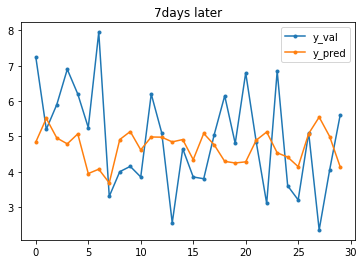

1.2596975593422899
[100]	valid_0's l1: 1.2246
[200]	valid_0's l1: 1.22695
[300]	valid_0's l1: 1.25043
[400]	valid_0's l1: 1.25276
[500]	valid_0's l1: 1.25249
[600]	valid_0's l1: 1.25752
[700]	valid_0's l1: 1.25955
[800]	valid_0's l1: 1.25985
[900]	valid_0's l1: 1.2578
[1000]	valid_0's l1: 1.25554
[1100]	valid_0's l1: 1.25453
[1200]	valid_0's l1: 1.25387
[1300]	valid_0's l1: 1.253
[1400]	valid_0's l1: 1.25256
[1500]	valid_0's l1: 1.2519
[1600]	valid_0's l1: 1.2509
[1700]	valid_0's l1: 1.2505
[1800]	valid_0's l1: 1.25032
[1900]	valid_0's l1: 1.24997
[2000]	valid_0's l1: 1.24981


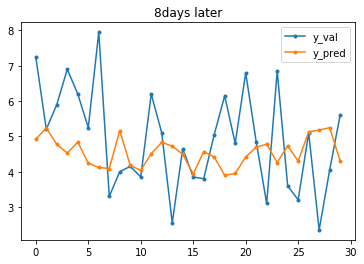

1.2498090094033503
[100]	valid_0's l1: 1.25252
[200]	valid_0's l1: 1.27971
[300]	valid_0's l1: 1.28487
[400]	valid_0's l1: 1.29758
[500]	valid_0's l1: 1.30152
[600]	valid_0's l1: 1.30334
[700]	valid_0's l1: 1.30814
[800]	valid_0's l1: 1.31127
[900]	valid_0's l1: 1.31149
[1000]	valid_0's l1: 1.30975
[1100]	valid_0's l1: 1.30775
[1200]	valid_0's l1: 1.30537
[1300]	valid_0's l1: 1.30409
[1400]	valid_0's l1: 1.30309
[1500]	valid_0's l1: 1.30198
[1600]	valid_0's l1: 1.3009
[1700]	valid_0's l1: 1.30089
[1800]	valid_0's l1: 1.30075
[1900]	valid_0's l1: 1.30032
[2000]	valid_0's l1: 1.30044


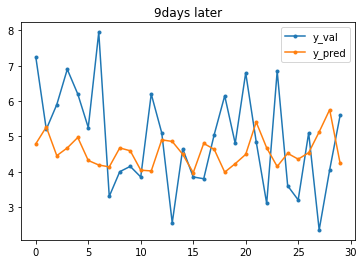

1.3004396373500715
[100]	valid_0's l1: 1.17233
[200]	valid_0's l1: 1.19278
[300]	valid_0's l1: 1.21094
[400]	valid_0's l1: 1.21378
[500]	valid_0's l1: 1.21584
[600]	valid_0's l1: 1.22181
[700]	valid_0's l1: 1.22683
[800]	valid_0's l1: 1.23143
[900]	valid_0's l1: 1.23408
[1000]	valid_0's l1: 1.23425
[1100]	valid_0's l1: 1.23272
[1200]	valid_0's l1: 1.23219
[1300]	valid_0's l1: 1.2311
[1400]	valid_0's l1: 1.22991
[1500]	valid_0's l1: 1.22925
[1600]	valid_0's l1: 1.22873
[1700]	valid_0's l1: 1.22813
[1800]	valid_0's l1: 1.22798
[1900]	valid_0's l1: 1.22791
[2000]	valid_0's l1: 1.22748


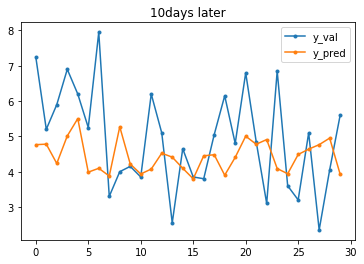

1.227475344192952
[100]	valid_0's l1: 1.23262
[200]	valid_0's l1: 1.26569
[300]	valid_0's l1: 1.28507
[400]	valid_0's l1: 1.29008
[500]	valid_0's l1: 1.29167
[600]	valid_0's l1: 1.29139
[700]	valid_0's l1: 1.29523
[800]	valid_0's l1: 1.29643
[900]	valid_0's l1: 1.29864
[1000]	valid_0's l1: 1.29868
[1100]	valid_0's l1: 1.29839
[1200]	valid_0's l1: 1.29734
[1300]	valid_0's l1: 1.29725
[1400]	valid_0's l1: 1.29633
[1500]	valid_0's l1: 1.29642
[1600]	valid_0's l1: 1.29616
[1700]	valid_0's l1: 1.29587
[1800]	valid_0's l1: 1.29561
[1900]	valid_0's l1: 1.29568
[2000]	valid_0's l1: 1.29585


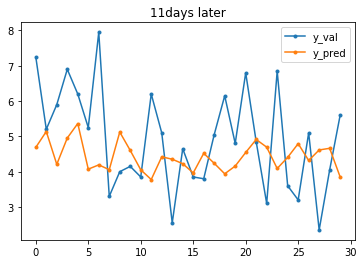

1.2958499125271985
[100]	valid_0's l1: 1.25492
[200]	valid_0's l1: 1.25291
[300]	valid_0's l1: 1.26787
[400]	valid_0's l1: 1.27654
[500]	valid_0's l1: 1.28626
[600]	valid_0's l1: 1.29516
[700]	valid_0's l1: 1.29862
[800]	valid_0's l1: 1.30457
[900]	valid_0's l1: 1.30429
[1000]	valid_0's l1: 1.30435
[1100]	valid_0's l1: 1.30417
[1200]	valid_0's l1: 1.30468
[1300]	valid_0's l1: 1.30432
[1400]	valid_0's l1: 1.30462
[1500]	valid_0's l1: 1.30434
[1600]	valid_0's l1: 1.30404
[1700]	valid_0's l1: 1.30424
[1800]	valid_0's l1: 1.30424
[1900]	valid_0's l1: 1.30399
[2000]	valid_0's l1: 1.3041


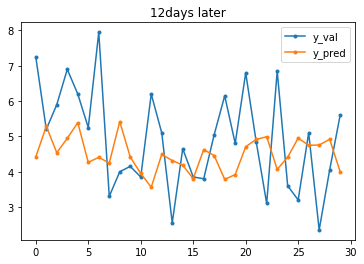

1.304099971860363
[100]	valid_0's l1: 1.23827
[200]	valid_0's l1: 1.23215
[300]	valid_0's l1: 1.24936
[400]	valid_0's l1: 1.26557
[500]	valid_0's l1: 1.27474
[600]	valid_0's l1: 1.28276
[700]	valid_0's l1: 1.28794
[800]	valid_0's l1: 1.29237
[900]	valid_0's l1: 1.29406
[1000]	valid_0's l1: 1.29452
[1100]	valid_0's l1: 1.2945
[1200]	valid_0's l1: 1.29404
[1300]	valid_0's l1: 1.29415
[1400]	valid_0's l1: 1.29471
[1500]	valid_0's l1: 1.29422
[1600]	valid_0's l1: 1.29446
[1700]	valid_0's l1: 1.29493
[1800]	valid_0's l1: 1.29487
[1900]	valid_0's l1: 1.29487
[2000]	valid_0's l1: 1.29497


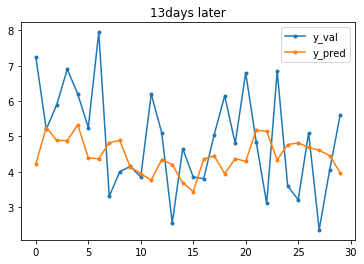

1.2949719909889097
[100]	valid_0's l1: 1.15504
[200]	valid_0's l1: 1.18587
[300]	valid_0's l1: 1.18179
[400]	valid_0's l1: 1.19352
[500]	valid_0's l1: 1.20561
[600]	valid_0's l1: 1.21511
[700]	valid_0's l1: 1.21947
[800]	valid_0's l1: 1.2228
[900]	valid_0's l1: 1.22438
[1000]	valid_0's l1: 1.2265
[1100]	valid_0's l1: 1.22723
[1200]	valid_0's l1: 1.22866
[1300]	valid_0's l1: 1.22936
[1400]	valid_0's l1: 1.22941
[1500]	valid_0's l1: 1.22973
[1600]	valid_0's l1: 1.23042
[1700]	valid_0's l1: 1.23066
[1800]	valid_0's l1: 1.23073
[1900]	valid_0's l1: 1.2305
[2000]	valid_0's l1: 1.23026


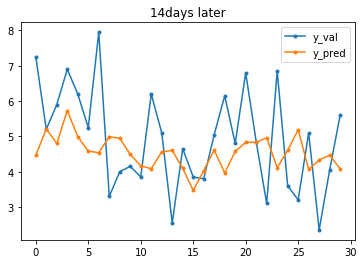

1.2302606506610658
[100]	valid_0's l1: 1.15842
[200]	valid_0's l1: 1.13026
[300]	valid_0's l1: 1.13567
[400]	valid_0's l1: 1.1496
[500]	valid_0's l1: 1.15789
[600]	valid_0's l1: 1.16446
[700]	valid_0's l1: 1.17359
[800]	valid_0's l1: 1.17672
[900]	valid_0's l1: 1.17985
[1000]	valid_0's l1: 1.1823
[1100]	valid_0's l1: 1.18383
[1200]	valid_0's l1: 1.18455
[1300]	valid_0's l1: 1.18578
[1400]	valid_0's l1: 1.186
[1500]	valid_0's l1: 1.18677
[1600]	valid_0's l1: 1.18636
[1700]	valid_0's l1: 1.18633
[1800]	valid_0's l1: 1.18592
[1900]	valid_0's l1: 1.18566
[2000]	valid_0's l1: 1.18576


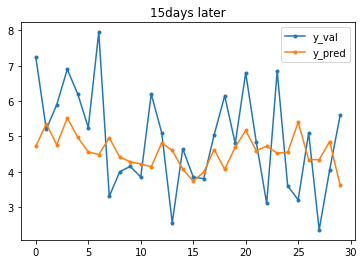

1.1857648213143235
[100]	valid_0's l1: 1.16026
[200]	valid_0's l1: 1.15606
[300]	valid_0's l1: 1.14491
[400]	valid_0's l1: 1.13826
[500]	valid_0's l1: 1.14327
[600]	valid_0's l1: 1.14904
[700]	valid_0's l1: 1.15277
[800]	valid_0's l1: 1.1554
[900]	valid_0's l1: 1.15659
[1000]	valid_0's l1: 1.15876
[1100]	valid_0's l1: 1.15976
[1200]	valid_0's l1: 1.16082
[1300]	valid_0's l1: 1.16132
[1400]	valid_0's l1: 1.16141
[1500]	valid_0's l1: 1.16191
[1600]	valid_0's l1: 1.16234
[1700]	valid_0's l1: 1.16242
[1800]	valid_0's l1: 1.16236
[1900]	valid_0's l1: 1.16251
[2000]	valid_0's l1: 1.16193


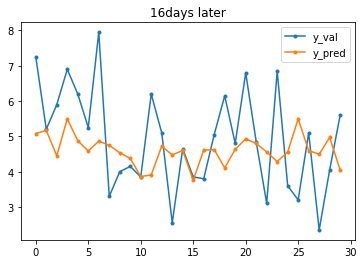

1.1619259700616966
[100]	valid_0's l1: 1.22812
[200]	valid_0's l1: 1.24123
[300]	valid_0's l1: 1.2596
[400]	valid_0's l1: 1.27759
[500]	valid_0's l1: 1.28771
[600]	valid_0's l1: 1.29738
[700]	valid_0's l1: 1.3034
[800]	valid_0's l1: 1.30666
[900]	valid_0's l1: 1.30977
[1000]	valid_0's l1: 1.311
[1100]	valid_0's l1: 1.31323
[1200]	valid_0's l1: 1.31399
[1300]	valid_0's l1: 1.31522
[1400]	valid_0's l1: 1.31682
[1500]	valid_0's l1: 1.31747
[1600]	valid_0's l1: 1.31794
[1700]	valid_0's l1: 1.31784
[1800]	valid_0's l1: 1.3178
[1900]	valid_0's l1: 1.3175
[2000]	valid_0's l1: 1.31719


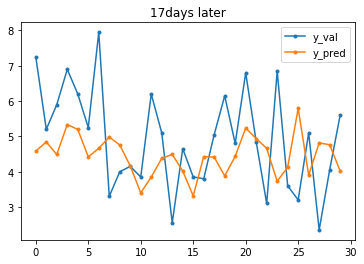

1.3171913829539539
[100]	valid_0's l1: 1.1697
[200]	valid_0's l1: 1.19156
[300]	valid_0's l1: 1.22524
[400]	valid_0's l1: 1.23051
[500]	valid_0's l1: 1.23997
[600]	valid_0's l1: 1.24504
[700]	valid_0's l1: 1.24957
[800]	valid_0's l1: 1.25452
[900]	valid_0's l1: 1.25804
[1000]	valid_0's l1: 1.26123
[1100]	valid_0's l1: 1.26359
[1200]	valid_0's l1: 1.26527
[1300]	valid_0's l1: 1.2663
[1400]	valid_0's l1: 1.26649
[1500]	valid_0's l1: 1.26635
[1600]	valid_0's l1: 1.26613
[1700]	valid_0's l1: 1.26614
[1800]	valid_0's l1: 1.26663
[1900]	valid_0's l1: 1.26704
[2000]	valid_0's l1: 1.26719


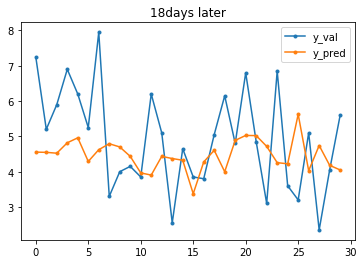

1.2671904851929978
[100]	valid_0's l1: 1.22126
[200]	valid_0's l1: 1.22485
[300]	valid_0's l1: 1.25035
[400]	valid_0's l1: 1.25795
[500]	valid_0's l1: 1.26455
[600]	valid_0's l1: 1.27046
[700]	valid_0's l1: 1.27418
[800]	valid_0's l1: 1.27699
[900]	valid_0's l1: 1.28122
[1000]	valid_0's l1: 1.28418
[1100]	valid_0's l1: 1.28592
[1200]	valid_0's l1: 1.28832
[1300]	valid_0's l1: 1.29037
[1400]	valid_0's l1: 1.29125
[1500]	valid_0's l1: 1.29154
[1600]	valid_0's l1: 1.29045
[1700]	valid_0's l1: 1.29048
[1800]	valid_0's l1: 1.29032
[1900]	valid_0's l1: 1.2905
[2000]	valid_0's l1: 1.29067


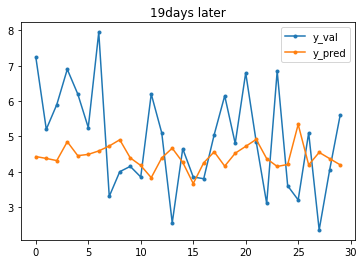

1.2906696351926474
[100]	valid_0's l1: 1.19696
[200]	valid_0's l1: 1.17956
[300]	valid_0's l1: 1.17978
[400]	valid_0's l1: 1.18156
[500]	valid_0's l1: 1.18754
[600]	valid_0's l1: 1.19415
[700]	valid_0's l1: 1.19765
[800]	valid_0's l1: 1.20072
[900]	valid_0's l1: 1.20405
[1000]	valid_0's l1: 1.20775
[1100]	valid_0's l1: 1.20967
[1200]	valid_0's l1: 1.21069
[1300]	valid_0's l1: 1.21196
[1400]	valid_0's l1: 1.21203
[1500]	valid_0's l1: 1.21174
[1600]	valid_0's l1: 1.21218
[1700]	valid_0's l1: 1.21205
[1800]	valid_0's l1: 1.21191
[1900]	valid_0's l1: 1.21183
[2000]	valid_0's l1: 1.21251


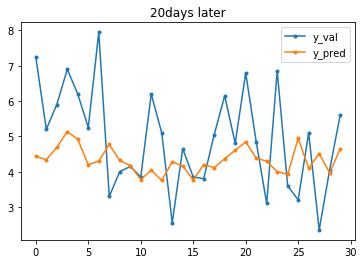

1.2125051523516912
[100]	valid_0's l1: 1.23489
[200]	valid_0's l1: 1.2149
[300]	valid_0's l1: 1.2019
[400]	valid_0's l1: 1.21346
[500]	valid_0's l1: 1.21617
[600]	valid_0's l1: 1.22023
[700]	valid_0's l1: 1.22493
[800]	valid_0's l1: 1.23035
[900]	valid_0's l1: 1.23362
[1000]	valid_0's l1: 1.23584
[1100]	valid_0's l1: 1.238
[1200]	valid_0's l1: 1.23968
[1300]	valid_0's l1: 1.24048
[1400]	valid_0's l1: 1.24082
[1500]	valid_0's l1: 1.24079
[1600]	valid_0's l1: 1.24133
[1700]	valid_0's l1: 1.24168
[1800]	valid_0's l1: 1.24167
[1900]	valid_0's l1: 1.24179
[2000]	valid_0's l1: 1.24185


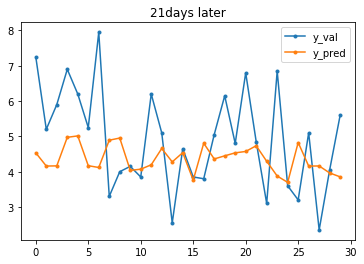

1.2418548458717074
[100]	valid_0's l1: 1.20574
[200]	valid_0's l1: 1.21771
[300]	valid_0's l1: 1.22705
[400]	valid_0's l1: 1.24335
[500]	valid_0's l1: 1.24842
[600]	valid_0's l1: 1.25346
[700]	valid_0's l1: 1.25984
[800]	valid_0's l1: 1.26284
[900]	valid_0's l1: 1.2658
[1000]	valid_0's l1: 1.26963
[1100]	valid_0's l1: 1.27123
[1200]	valid_0's l1: 1.27288
[1300]	valid_0's l1: 1.27486
[1400]	valid_0's l1: 1.27515
[1500]	valid_0's l1: 1.27616
[1600]	valid_0's l1: 1.27639
[1700]	valid_0's l1: 1.27572
[1800]	valid_0's l1: 1.27609
[1900]	valid_0's l1: 1.27623
[2000]	valid_0's l1: 1.27579


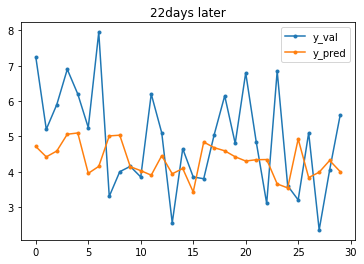

1.2757877404228852
[100]	valid_0's l1: 1.25407
[200]	valid_0's l1: 1.25683
[300]	valid_0's l1: 1.25659
[400]	valid_0's l1: 1.26832
[500]	valid_0's l1: 1.27414
[600]	valid_0's l1: 1.27956
[700]	valid_0's l1: 1.28375
[800]	valid_0's l1: 1.2882
[900]	valid_0's l1: 1.28941
[1000]	valid_0's l1: 1.29221
[1100]	valid_0's l1: 1.2937
[1200]	valid_0's l1: 1.29383
[1300]	valid_0's l1: 1.29412
[1400]	valid_0's l1: 1.29422
[1500]	valid_0's l1: 1.2943
[1600]	valid_0's l1: 1.29388
[1700]	valid_0's l1: 1.29417
[1800]	valid_0's l1: 1.29432
[1900]	valid_0's l1: 1.29436
[2000]	valid_0's l1: 1.29469


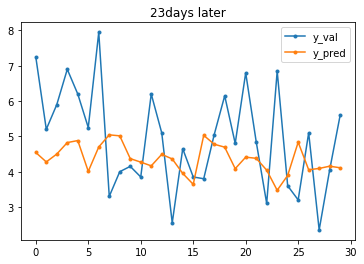

1.2946855221062659
[100]	valid_0's l1: 1.26209
[200]	valid_0's l1: 1.26449
[300]	valid_0's l1: 1.28098
[400]	valid_0's l1: 1.29231
[500]	valid_0's l1: 1.30287
[600]	valid_0's l1: 1.30924
[700]	valid_0's l1: 1.31207
[800]	valid_0's l1: 1.31446
[900]	valid_0's l1: 1.31558
[1000]	valid_0's l1: 1.31693
[1100]	valid_0's l1: 1.31745
[1200]	valid_0's l1: 1.31793
[1300]	valid_0's l1: 1.31884
[1400]	valid_0's l1: 1.31948
[1500]	valid_0's l1: 1.31979
[1600]	valid_0's l1: 1.3198
[1700]	valid_0's l1: 1.31989
[1800]	valid_0's l1: 1.32007
[1900]	valid_0's l1: 1.32014
[2000]	valid_0's l1: 1.32021


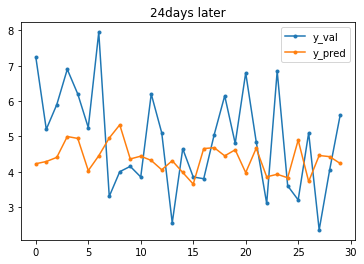

1.3202101019499968
[100]	valid_0's l1: 1.20922
[200]	valid_0's l1: 1.19412
[300]	valid_0's l1: 1.19726
[400]	valid_0's l1: 1.20798
[500]	valid_0's l1: 1.20856
[600]	valid_0's l1: 1.21116
[700]	valid_0's l1: 1.21211
[800]	valid_0's l1: 1.21233
[900]	valid_0's l1: 1.21133
[1000]	valid_0's l1: 1.2118
[1100]	valid_0's l1: 1.21194
[1200]	valid_0's l1: 1.21136
[1300]	valid_0's l1: 1.21136
[1400]	valid_0's l1: 1.21067
[1500]	valid_0's l1: 1.20984
[1600]	valid_0's l1: 1.20897
[1700]	valid_0's l1: 1.20822
[1800]	valid_0's l1: 1.20767
[1900]	valid_0's l1: 1.20739
[2000]	valid_0's l1: 1.20687


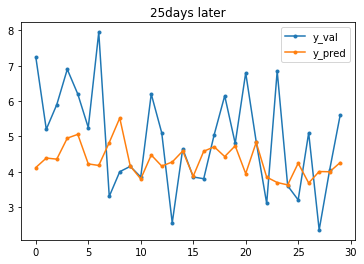

1.2068679043661557
[100]	valid_0's l1: 1.24198
[200]	valid_0's l1: 1.22115
[300]	valid_0's l1: 1.21914
[400]	valid_0's l1: 1.22831
[500]	valid_0's l1: 1.23421
[600]	valid_0's l1: 1.23971
[700]	valid_0's l1: 1.23902
[800]	valid_0's l1: 1.24034
[900]	valid_0's l1: 1.2416
[1000]	valid_0's l1: 1.2428
[1100]	valid_0's l1: 1.24284
[1200]	valid_0's l1: 1.24241
[1300]	valid_0's l1: 1.24191
[1400]	valid_0's l1: 1.24103
[1500]	valid_0's l1: 1.24021
[1600]	valid_0's l1: 1.23961
[1700]	valid_0's l1: 1.23893
[1800]	valid_0's l1: 1.23858
[1900]	valid_0's l1: 1.23808
[2000]	valid_0's l1: 1.23808


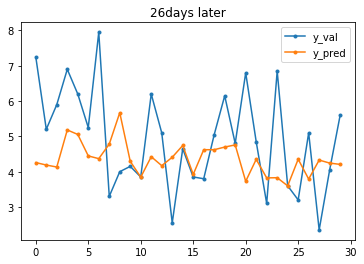

1.2380791245852758
[100]	valid_0's l1: 1.25332
[200]	valid_0's l1: 1.20793
[300]	valid_0's l1: 1.22559
[400]	valid_0's l1: 1.24576
[500]	valid_0's l1: 1.25997
[600]	valid_0's l1: 1.26415
[700]	valid_0's l1: 1.26293
[800]	valid_0's l1: 1.26213
[900]	valid_0's l1: 1.2632
[1000]	valid_0's l1: 1.26364
[1100]	valid_0's l1: 1.2629
[1200]	valid_0's l1: 1.26252
[1300]	valid_0's l1: 1.26189
[1400]	valid_0's l1: 1.2618
[1500]	valid_0's l1: 1.26117
[1600]	valid_0's l1: 1.26079
[1700]	valid_0's l1: 1.25985
[1800]	valid_0's l1: 1.25923
[1900]	valid_0's l1: 1.25897
[2000]	valid_0's l1: 1.25858


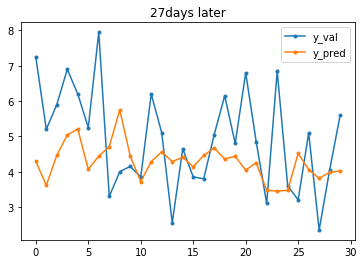

1.258579802666284
[100]	valid_0's l1: 1.20119
[200]	valid_0's l1: 1.21232
[300]	valid_0's l1: 1.18837
[400]	valid_0's l1: 1.1855
[500]	valid_0's l1: 1.18814
[600]	valid_0's l1: 1.18379
[700]	valid_0's l1: 1.18396
[800]	valid_0's l1: 1.18814
[900]	valid_0's l1: 1.19164
[1000]	valid_0's l1: 1.19597
[1100]	valid_0's l1: 1.19759
[1200]	valid_0's l1: 1.19846
[1300]	valid_0's l1: 1.19882
[1400]	valid_0's l1: 1.19896
[1500]	valid_0's l1: 1.1988
[1600]	valid_0's l1: 1.19847
[1700]	valid_0's l1: 1.19845
[1800]	valid_0's l1: 1.19785
[1900]	valid_0's l1: 1.19781
[2000]	valid_0's l1: 1.19771


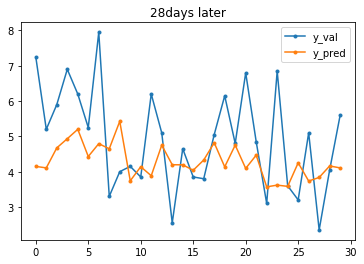

1.1977131952579247
[100]	valid_0's l1: 1.19678
[200]	valid_0's l1: 1.19894
[300]	valid_0's l1: 1.20053
[400]	valid_0's l1: 1.20689
[500]	valid_0's l1: 1.21276
[600]	valid_0's l1: 1.21639
[700]	valid_0's l1: 1.21697
[800]	valid_0's l1: 1.21765
[900]	valid_0's l1: 1.22014
[1000]	valid_0's l1: 1.22094
[1100]	valid_0's l1: 1.22093
[1200]	valid_0's l1: 1.2204
[1300]	valid_0's l1: 1.22079
[1400]	valid_0's l1: 1.22126
[1500]	valid_0's l1: 1.2221
[1600]	valid_0's l1: 1.22297
[1700]	valid_0's l1: 1.22364
[1800]	valid_0's l1: 1.22456
[1900]	valid_0's l1: 1.22581
[2000]	valid_0's l1: 1.22699


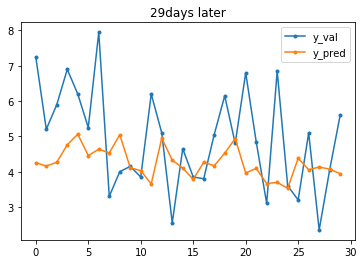

1.2269880158984205
[100]	valid_0's l1: 1.21784
[200]	valid_0's l1: 1.18418
[300]	valid_0's l1: 1.1754
[400]	valid_0's l1: 1.18034
[500]	valid_0's l1: 1.19004
[600]	valid_0's l1: 1.19558
[700]	valid_0's l1: 1.19577
[800]	valid_0's l1: 1.19728
[900]	valid_0's l1: 1.19966
[1000]	valid_0's l1: 1.20074
[1100]	valid_0's l1: 1.20106
[1200]	valid_0's l1: 1.20067
[1300]	valid_0's l1: 1.2013
[1400]	valid_0's l1: 1.20099
[1500]	valid_0's l1: 1.20139
[1600]	valid_0's l1: 1.20127
[1700]	valid_0's l1: 1.20206
[1800]	valid_0's l1: 1.20339
[1900]	valid_0's l1: 1.2043
[2000]	valid_0's l1: 1.20488


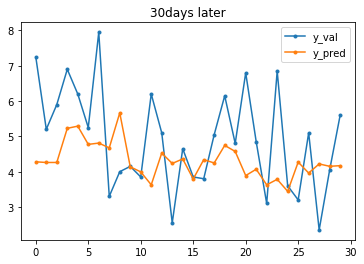

1.2048819675086089
[100]	valid_0's l1: 1.22995
[200]	valid_0's l1: 1.18937
[300]	valid_0's l1: 1.17868
[400]	valid_0's l1: 1.18202
[500]	valid_0's l1: 1.18734
[600]	valid_0's l1: 1.18568
[700]	valid_0's l1: 1.18721
[800]	valid_0's l1: 1.18957
[900]	valid_0's l1: 1.19076
[1000]	valid_0's l1: 1.19183
[1100]	valid_0's l1: 1.19189
[1200]	valid_0's l1: 1.19224
[1300]	valid_0's l1: 1.19303
[1400]	valid_0's l1: 1.19331
[1500]	valid_0's l1: 1.19337
[1600]	valid_0's l1: 1.19422
[1700]	valid_0's l1: 1.19399
[1800]	valid_0's l1: 1.19436
[1900]	valid_0's l1: 1.19441
[2000]	valid_0's l1: 1.19428


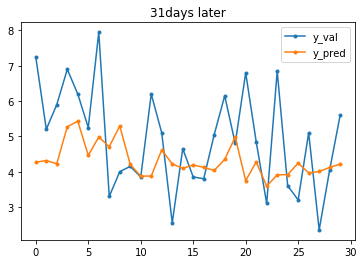

1.1942779054893053
[100]	valid_0's l1: 1.23564
[200]	valid_0's l1: 1.24741
[300]	valid_0's l1: 1.25178
[400]	valid_0's l1: 1.26617
[500]	valid_0's l1: 1.27142
[600]	valid_0's l1: 1.2691
[700]	valid_0's l1: 1.27015
[800]	valid_0's l1: 1.27619
[900]	valid_0's l1: 1.27693
[1000]	valid_0's l1: 1.27728
[1100]	valid_0's l1: 1.27864
[1200]	valid_0's l1: 1.27874
[1300]	valid_0's l1: 1.27972
[1400]	valid_0's l1: 1.27949
[1500]	valid_0's l1: 1.27953
[1600]	valid_0's l1: 1.27934
[1700]	valid_0's l1: 1.28028
[1800]	valid_0's l1: 1.28028
[1900]	valid_0's l1: 1.28074
[2000]	valid_0's l1: 1.28079


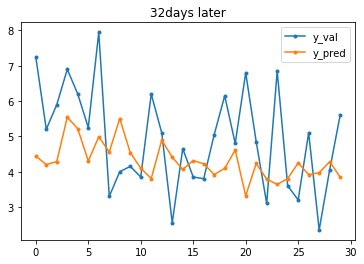

1.280791070184253
[100]	valid_0's l1: 1.22793
[200]	valid_0's l1: 1.22426
[300]	valid_0's l1: 1.21116
[400]	valid_0's l1: 1.2219
[500]	valid_0's l1: 1.22912
[600]	valid_0's l1: 1.23264
[700]	valid_0's l1: 1.23437
[800]	valid_0's l1: 1.23867
[900]	valid_0's l1: 1.23901
[1000]	valid_0's l1: 1.23942
[1100]	valid_0's l1: 1.23849
[1200]	valid_0's l1: 1.23731
[1300]	valid_0's l1: 1.23703
[1400]	valid_0's l1: 1.23615
[1500]	valid_0's l1: 1.23541
[1600]	valid_0's l1: 1.23547
[1700]	valid_0's l1: 1.23536
[1800]	valid_0's l1: 1.2354
[1900]	valid_0's l1: 1.23542
[2000]	valid_0's l1: 1.23474


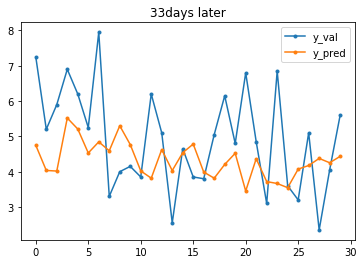

1.234735279052473
[100]	valid_0's l1: 1.21556
[200]	valid_0's l1: 1.20906
[300]	valid_0's l1: 1.21718
[400]	valid_0's l1: 1.21448
[500]	valid_0's l1: 1.2108
[600]	valid_0's l1: 1.20866
[700]	valid_0's l1: 1.20622
[800]	valid_0's l1: 1.20658
[900]	valid_0's l1: 1.20667
[1000]	valid_0's l1: 1.20658
[1100]	valid_0's l1: 1.20638
[1200]	valid_0's l1: 1.2063
[1300]	valid_0's l1: 1.20609
[1400]	valid_0's l1: 1.20581
[1500]	valid_0's l1: 1.20527
[1600]	valid_0's l1: 1.20655
[1700]	valid_0's l1: 1.20771
[1800]	valid_0's l1: 1.20794
[1900]	valid_0's l1: 1.2082
[2000]	valid_0's l1: 1.20837


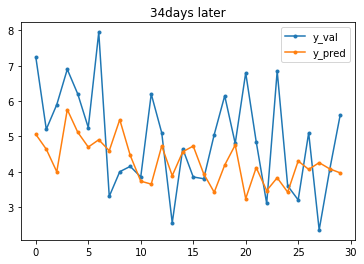

1.2083692851688628


In [55]:
y_columns = ['ws_max']
ws_max_models = {}
scores = []

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, ws_x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, ws_x_columns, y_columns)
    
    ws_max_models[future] = ws_model(x_train, y_train, x_val, y_val)
    
    pred = ws_max_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
#     score = dict(temp_max_models[future].best_score)['valid_0']['l1']
    score = mean_absolute_error(y_val, pred)
    scores.append(score)
    print(score)
    print('==========================================================================')

In [56]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.2493454744257833
min 1.1619259700616966
max 1.3202101019499968


In [51]:
print("mean", sum(scores) / len(scores))
print("min", min(scores))
print("max", max(scores))

mean 1.8381545524757306
min 1.6561904456419174
max 2.019388893467308


## Min

In [ ]:
y_columns = ['ws_max']
ws_max_models = {}
scores = []

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30
    x_train, y_train = trans(target, 0, train_split, past, future, ws_x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, ws_x_columns, y_columns)
    
    d_train = lgb.Dataset(x_train, y_train)
    d_val = lgb.Dataset(x_val, y_val)

    ws_max_models[future] = create_model(x_train, y_train, x_val, y_val)
    
    pred = ws_max_models[future].predict(x_val)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(pred, '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()
    
    score = dict(temp_max_models[future].best_score)['valid_0']['l1']

    scores.append(score)
    print(score)
    print('==========================================================================')

In [ ]:
x_test = np.array(target.loc[700:, ['year', 'month', 'day', 'dayofweek', 'supply', 'temp_max', 'temp_min', 'temp_mean']])
x_test = x_test.reshape(1,-1)

In [ ]:
supply_result=[]
for future in range(7, 35):
    supply_result.append(supply_models[future].predict(x_test))
supply_result = np.array(supply_result).reshape(-1)

In [ ]:
x_test = np.array(target.loc[700:, ['year', 'month', 'day', 'temp_max', 'temp_min', 'temp_mean']])
x_test = x_test.reshape(1,-1)

In [ ]:
temp_max_result=[]
for future in range(7, 35):
    temp_max_result.append(temp_max_models[future].predict(x_test))
temp_max_result = np.array(temp_max_result).reshape(-1)

In [ ]:
temp_min_result=[]
for future in range(7, 35):
    temp_min_result.append(temp_min_models[future].predict(x_test))
temp_min_result = np.array(temp_min_result).reshape(-1)

In [ ]:
temp_mean_result=[]
for future in range(7, 35):
    temp_mean_result.append(temp_mean_models[future].predict(x_test))
temp_mean_result = np.array(temp_mean_result).reshape(-1)

In [ ]:
submission = pd.read_csv('data/sample_submission.csv')
submission_bottom_half = submission.loc[28:,:]
submission = submission.loc[:27, :]
test = submission.copy()
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek
test['supply'] = np.array(supply_result).reshape(-1)
test['temp_max'] = np.array(temp_max_result).reshape(-1)
test['temp_min'] = np.array(temp_min_result).reshape(-1)
test['temp_mean'] = np.array(temp_mean_result).reshape(-1)
test.head()

In [ ]:
def create_model(x_data, y_data, k=5):
    models = []
    
    k_fold = KFold(n_splits=k, shuffle=True, random_state=77)
    
    for train_idx, val_idx in k_fold.split(x_data):
        x_train, y_train = x_data.iloc[train_idx], y_data[train_idx]
        x_val, y_val = x_data.iloc[val_idx], y_data[val_idx]
    
        d_train = lgb.Dataset(x_train, y_train)
        d_val = lgb.Dataset(x_val, y_val)

        params = {
            'metric': 'mse',
            'seed':777
            }

        model = lgb.train(params, d_train, 1000, d_val, verbose_eval=1000, early_stopping_rounds=100)
        
        plt.rcParams['figure.figsize'] = [12, 4]
        plt.plot(np.array(y_val), '.-', label='y_val')
        plt.plot(model.predict(x_val), '.-', label='y_pred')
        plt.legend()
        plt.show()
        models.append(model)

    return models

In [ ]:
x_train = target.loc[:, ['supply', 'year', 'month', 'day', 'dayofweek', 'temp_max', 'temp_min', 'temp_mean']]
y_train = target.loc[:, ['smp_min', 'smp_max', 'smp_mean' ]]

smp_models = {}
for label in y_train.columns:
    print('train column : ', label)
    smp_models[label] = create_model(x_train, y_train[label])
    print('==========================================================================')

In [ ]:
x_test = test.loc[:,['supply', 'year', 'month', 'day', 'dayofweek', 'temp_max', 'temp_min', 'temp_mean']]
for label in ['smp_min', 'smp_max', 'smp_mean']:
    preds = []
    for i in range(5):
        preds.append(smp_models[label][i].predict(x_test))
    pred = sum(preds)/len(preds)
    test[label] = pred

In [ ]:
submission.loc[:, ['smp_min', 'smp_max', 'smp_mean', 'supply']] = test.loc[:,['smp_min', 'smp_max', 'smp_mean', 'supply']]
submission = pd.concat([submission, submission_bottom_half], axis = 0)
submission

In [ ]:
submission.to_csv('Dacon_baseline.csv', index=False)